## BANK MARKETING Project

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
ds=pd.read_csv(r'D:\Files\termdeposit_train.csv')
ds

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

This data frame contains information related to **client data of Portuguese Bank**. It contains **31647 rows and 18 columns** out of which 17 columns are inputs and 1 column is **target variable i.e. 'subscribed' column**.The data frame contains both numeric data as well as catagorical data.  
Target variable has catagotical data, thus it represents **Classification Problem**.  
***The goal is to predict whether the client has subscribed a term deposit or not.***   

In [3]:
ds['ID'].nunique()#Checking number of unique values present in ID feature.

31647

All of the values are unique and it does not contribute towards the analysis, hence, we can drop it.

In [4]:
ds.drop('ID',axis=1,inplace=True)#Dropping column
ds

age         job   marital  education default  balance housing loan  \
0       56      admin.   married    unknown      no     1933      no   no   
1       31     unknown   married  secondary      no        3      no   no   
2       27    services   married  secondary      no      891     yes   no   
3       57  management  divorced   tertiary      no     3287      no   no   
4       31  technician   married  secondary      no      119     yes   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
31642   29  management    single   tertiary      no        0     yes   no   
31643   53  management  divorced   tertiary      no      380      no  yes   
31644   32  management    single   tertiary      no      312      no   no   
31645   57  technician   married  secondary      no      225     yes   no   
31646   55  management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  unknown   
1       cellular   20   jul        91         2     -1         0  unknown   
2       cellular   18   jul       240         1     -1         0  unknown   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31642   cellular   12   may       116         2     -1         0  unknown   
31643   cellular    5   jun       438         2     -1         0  unknown   
31644   cellular    7   aug        37         3     -1         0  unknown   
31645  telephone   15   may        22         7    337        12  failure   
31646   cellular   11   jul      1973         2     -1         0  unknown   

      subscribed  
0             no  
1             no  
2             no  
3            yes  
4             no  
...          ...  
31642         no  
31643        yes  
31644         no  
31645         no  
31646        yes  

[31647 rows x 17 columns]

'ID' feature is dropped successfully. Now the data frame has 17 columns out of which 16 columns are inputs and remaining column is target variable.

In [5]:
#checking for whitespace characters 
col=ds.columns.tolist() #Storing columns name into list
space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable
for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not ds.loc[ds[i]==space].empty:#Checking if any row contains white space characters
            validation+=1#increasing 1 in 'validation' variable
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [6]:
ds.dtypes#Checking dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

There are two types of data present in this data frame which are **int64 and object**. Majority of the data have **object** data type.

In [7]:
ds.isnull().sum() #Checking null values

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

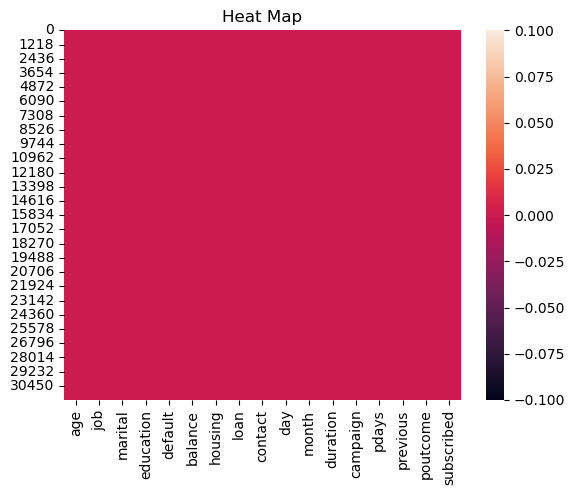

In [8]:
sb.heatmap(ds.isnull())#Visualizing null values via Heatmap
plt.title('Heat Map')
plt.show()

This data frame do not contains null values,however, there is **'unknown' value present in the data frame which represents null values.**

In [9]:
validation=0#Initilizaing variable
for i in col:#Iterating 'col' variable
    if not ds.loc[ds[i]=='unknown'].empty: #Checking if a particular column contains 'unknown' value.
        print(f'{i} column contains "unknown" value.')  #Printing
        validation+=1#increasing 1 in 'validation' variable
if validation==0:
    print('DataFrame does not contains "unknown" values.')

job column contains "unknown" value.
education column contains "unknown" value.
contact column contains "unknown" value.
poutcome column contains "unknown" value.


These are the columns which contains 'unknown' value, now we can replace them with their respected mode value since all these features have catagorical data.

In [10]:
a=['job','education','contact','poutcome']
for i in a:#Itertaing 'a' variable
    mode=ds[i].mode()[0]#storing mode value in 'mode' variable        
    ds[i].replace('unknown',mode,inplace=True)#replacing all 'unknown' values present in a column with mode  
    print(f'Using mode value as {mode} of {i} column.')#printing

Using mode value as blue-collar of job column.
Using mode value as secondary of education column.
Using mode value as cellular of contact column.
Using mode value as unknown of poutcome column.


We are getting 'unknown' as a mode in poutcome feature, thus, we can manually select most occuring value.

In [11]:
ds['poutcome'].value_counts() #checking value counts

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [12]:
#Using 'failure' as mode value
ds['poutcome'].replace('unknown','failure',inplace=True)

In [13]:
#Checking again for 'unknown' value 
validation=0#Initilizaing variable
for i in col:#Iterating 'col' variable
    if not ds.loc[ds[i]=='unknown'].empty: #Checking if a particular column contains 'unknown' value.
        validation+=1#increasing 1 in 'validation' variable
        print(f'{i} column contains "unknown" value.')  #Printing
    
if validation==0:
    print('DataFrame does not contains "unknown" values.')
ds

DataFrame does not contains "unknown" values.


age          job   marital  education default  balance housing loan  \
0       56       admin.   married  secondary      no     1933      no   no   
1       31  blue-collar   married  secondary      no        3      no   no   
2       27     services   married  secondary      no      891     yes   no   
3       57   management  divorced   tertiary      no     3287      no   no   
4       31   technician   married  secondary      no      119     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
31642   29   management    single   tertiary      no        0     yes   no   
31643   53   management  divorced   tertiary      no      380      no  yes   
31644   32   management    single   tertiary      no      312      no   no   
31645   57   technician   married  secondary      no      225     yes   no   
31646   55   management  divorced  secondary      no      204     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0      telephone   19   nov        44         2     -1         0  failure   
1       cellular   20   jul        91         2     -1         0  failure   
2       cellular   18   jul       240         1     -1         0  failure   
3       cellular   22   jun       867         1     84         3  success   
4       cellular    4   feb       380         1     -1         0  failure   
...          ...  ...   ...       ...       ...    ...       ...      ...   
31642   cellular   12   may       116         2     -1         0  failure   
31643   cellular    5   jun       438         2     -1         0  failure   
31644   cellular    7   aug        37         3     -1         0  failure   
31645  telephone   15   may        22         7    337        12  failure   
31646   cellular   11   jul      1973         2     -1         0  failure   

      subscribed  
0             no  
1             no  
2             no  
3            yes  
4             no  
...          ...  
31642         no  
31643        yes  
31644         no  
31645         no  
31646        yes  

[31647 rows x 17 columns]

In [14]:
#creating function to check for duplicates vales in data frame

def dup(x):#takes one argument 
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable.
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    else:
        print(f'Total duplicates values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(ds)

This data frame does not contains duplicate values.


In [15]:
ds.info()#Checking more information related to datas frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


This shows information related to the columns and about their Non-null count and Dtype. It also shows the memory usage , which is 4.1+MB in this case.

In [16]:
for i in col:#Iterating col variable
    print('\n',i,':-\nUnique values:',ds[i].unique(),'\nNumber of unique values:',ds[i].nunique(),'\n\n',ds[i].value_counts().to_frame('Value Counts'))#Printing


 age :-
Unique values: [56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90] 
Number of unique values: 76 

     Value Counts
32          1457
31          1417
33          1406
34          1321
35          1314
..           ...
92             1
95             1
93             1
94             1
90             1

[76 rows x 1 columns]

 job :-
Unique values: ['admin.' 'blue-collar' 'services' 'management' 'technician' 'retired'
 'housemaid' 'self-employed' 'student' 'entrepreneur' 'unemployed'] 
Number of unique values: 11 

                Value Counts
blue-collar            7048
management             6639
technician             5307
admin.                 3631
services               2903
retired                1574
self-employed          1123
entrepreneur           1008
unemployed              905
housemaid

This gives a breif information about unique values, count of unique values and value counts of each column present in the dataset. Target variable does not have same number of catagorical data,thus ,this data is unbalanced. 

In [17]:
ds.describe()#Using describe function

age        balance           day      duration      campaign  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247    1363.890258     15.835466    258.113534      2.765697   
std       10.625134    3028.304293      8.337097    257.118973      3.113830   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    318.500000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      39.576042      0.574272  
std       99.317592      2.422529  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

This gives the statistical information of the numerical columns. From the above description we can observe the following:   
1)All the columns have same count thus there are no missing values.    
2)Mean is greater than 50% in age,balance, duration and pdays features which means that the data is skewed to the right in this column.  
3)There is a huge jump between 75% and max in  age, balance,duration, campaign, pdays and previous features, hence, there might be outliers present in these columns. 

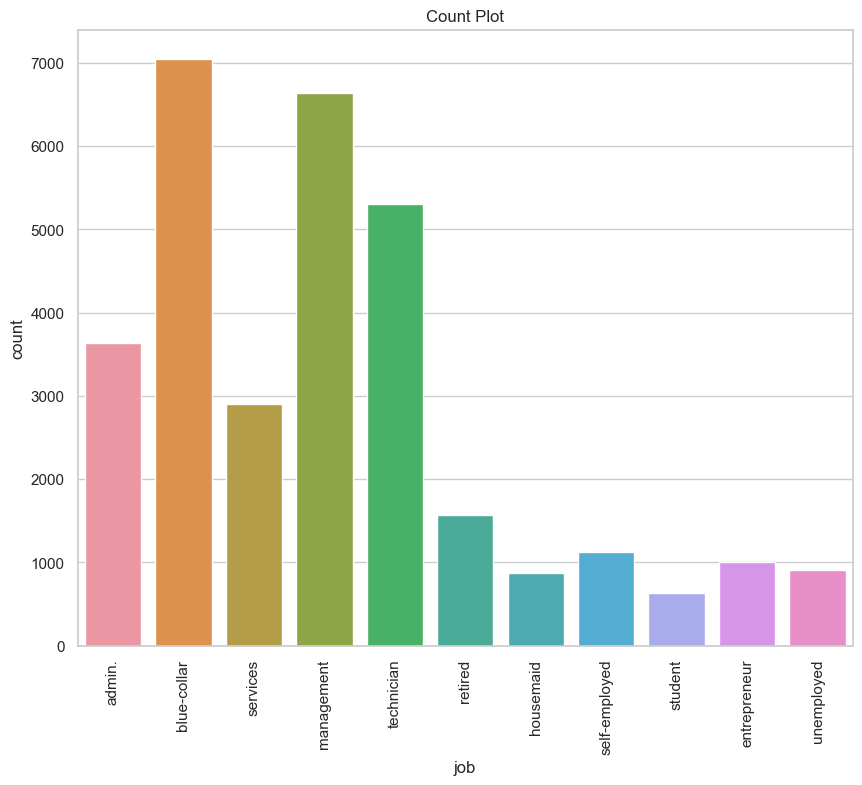

In [18]:
#Visualizing job feature via Count Plot
sb.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sb.countplot(data=ds,x='job')
plt.title("Count Plot")
plt.xticks(rotation=90)
plt.show()

Blue-collar and management jobs numbers are high than the others.Blue-collar is little bit high than management job.

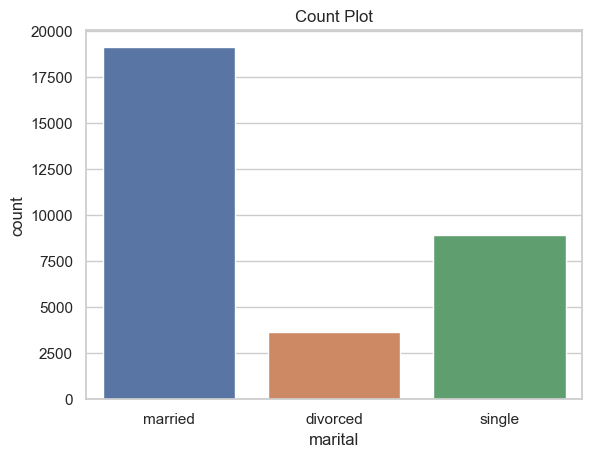

In [19]:
#Visualizing marital feature via Count Plot
sb.countplot(data=ds,x='marital')
plt.title("Count Plot")
plt.show()

Most of the clients are married.

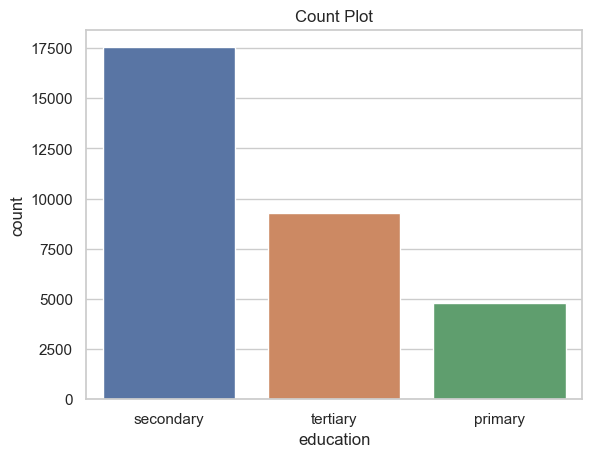

In [20]:
#Visualizing education feature via Count Plot
sb.countplot(data=ds,x='education')
plt.title("Count Plot")
plt.show()

Most of the clients have secondary education.

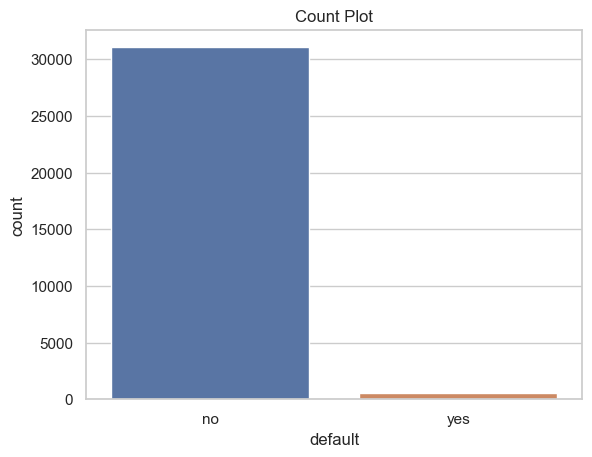

In [21]:
#Visualizing default feature via Count Plot
sb.countplot(data=ds,x='default')
plt.title("Count Plot")
plt.show()

Almost all of the  clients do not have credit in default.

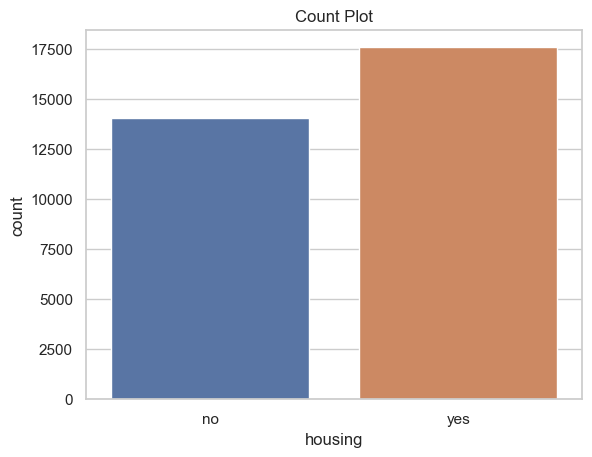

In [22]:
#Visualizing housing feature via Count Plot
sb.countplot(data=ds,x='housing')
plt.title("Count Plot")
plt.show()

Clients who have housing loans are bit high than the clients who do not have housing loan.

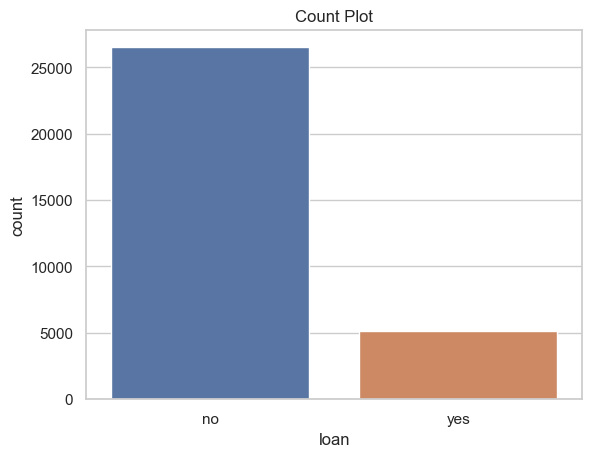

In [23]:
#Visualizing loan feature via Count Plot
sb.countplot(data=ds,x='loan')
plt.title("Count Plot")
plt.show()

Majority of clients do not have personal loan.

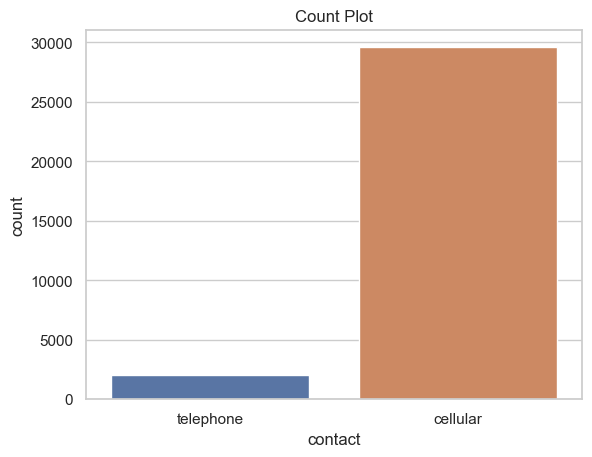

In [24]:
#Visualizing contact feature via Count Plot
sb.countplot(data=ds,x='contact')
plt.title("Count Plot")
plt.show()

Majority of the clients uses celluar type of communication.

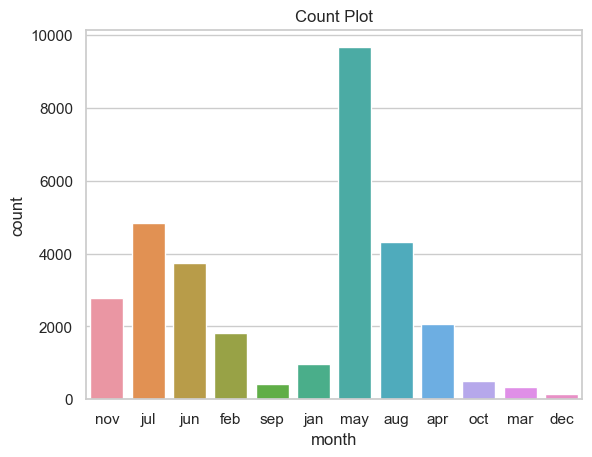

In [25]:
#Visualizing month feature via Count Plot
sb.countplot(data=ds,x='month')
plt.title("Count Plot")
plt.show()

Most of the clients are contacted in the month of May.

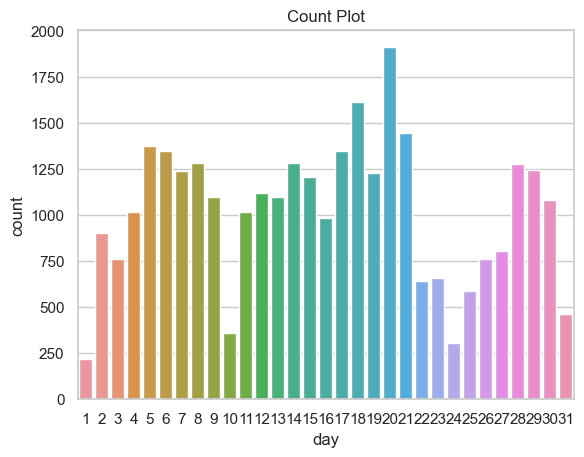

In [26]:
#Visualizing day feature via Count Plot
sb.countplot(data=ds,x='day')
plt.title("Count Plot")
plt.show()

20th day has the more frequency than the others.

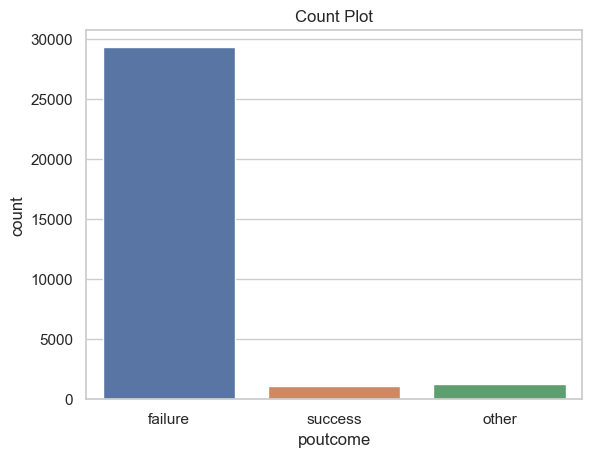

In [27]:
#Visualizing poutcome feature via Count Plot
sb.countplot(data=ds,x='poutcome')
plt.title("Count Plot")
plt.show()

Most of outcome of previous maketing campaign were a failure.

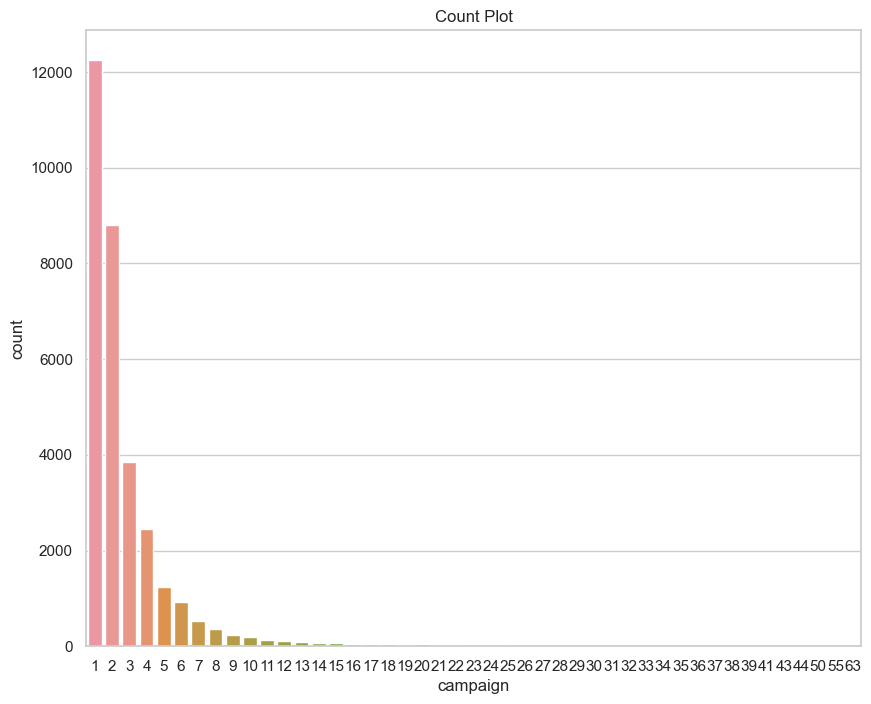

In [28]:
#Visualizing campaign feature via Count Plot
plt.figure(figsize=(10,8))
sb.countplot(data=ds,x='campaign')
plt.title("Count Plot")
plt.show()

Most of the clients have 1 number of contacts performed during the campaign.

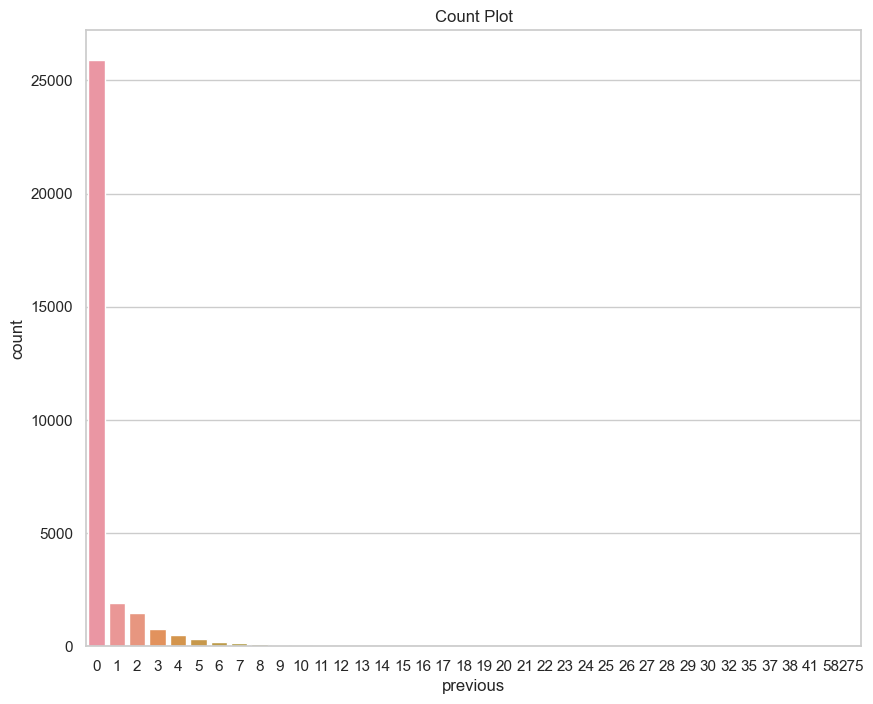

In [29]:
#Visualizing previous feature via Count Plot
plt.figure(figsize=(10,8))
sb.countplot(data=ds,x='previous')
plt.title("Count Plot")
plt.show()

Most of clients  have zero number of days that passed by after the client was last contacted.

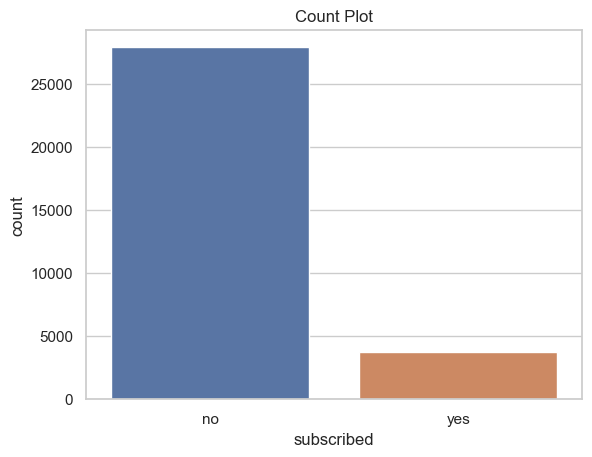

In [30]:
#Visualizing subscribed feature via Count Plot
sb.countplot(data=ds,x='subscribed')
plt.title("Count Plot")
plt.show()

Most of clients have not subcribed, thus, this data is not balanced.

In [31]:
log=[]#creating empty list
a=['age','balance','duration','campaign','pdays','previous']
def re():#creating function
    for i in a:#iterating a variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=ds,x=log[-1],y=i,hue='subscribed')
            plt.title('Linear Model Plot')
    plt.show()

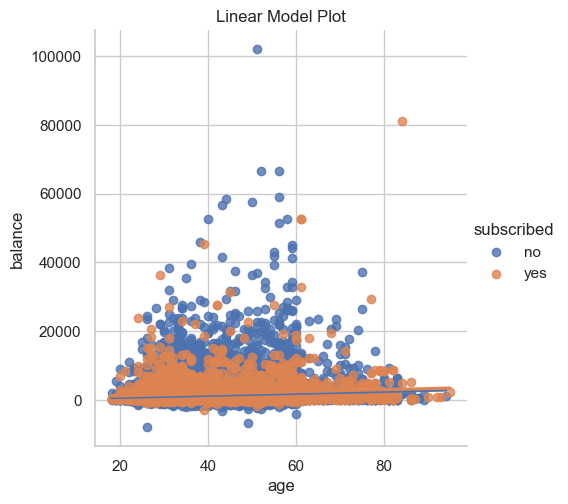

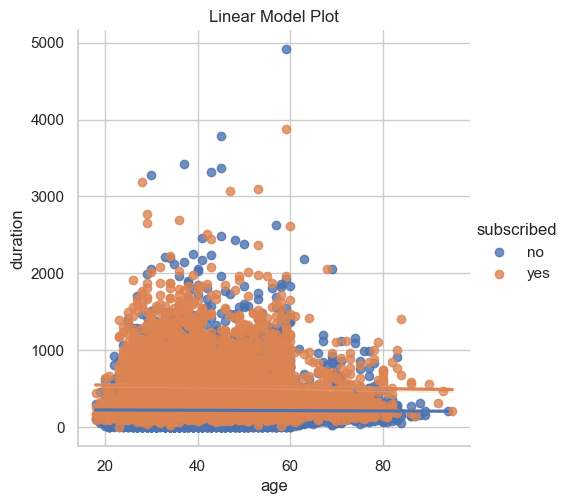

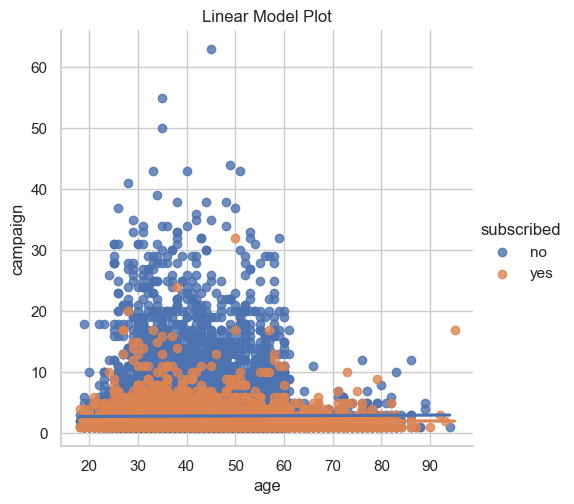

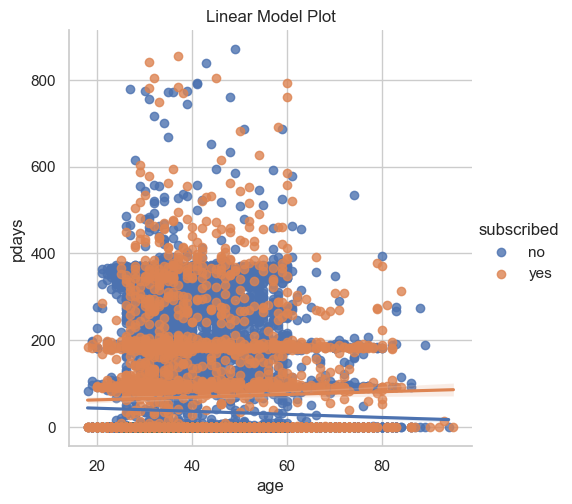

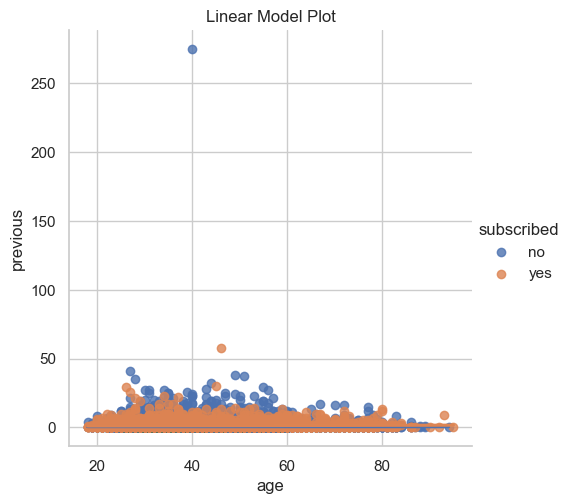

In [32]:
log.append('age')
re()

Age feature doesn't have much linear relation with other features. Most of data is concentrated around 20-60 Age.

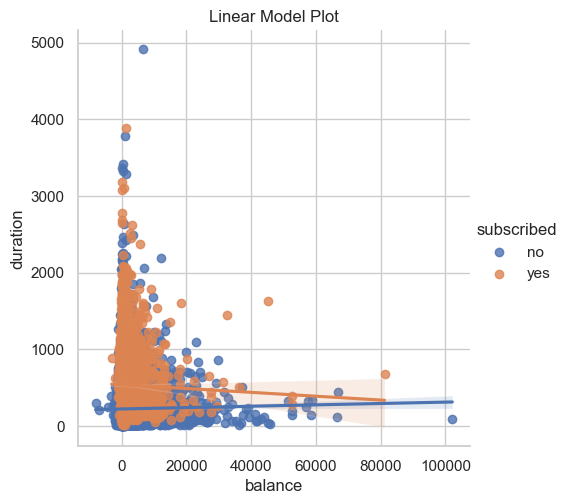

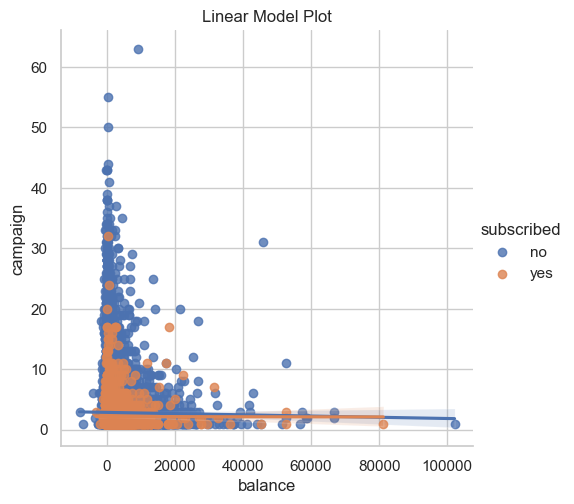

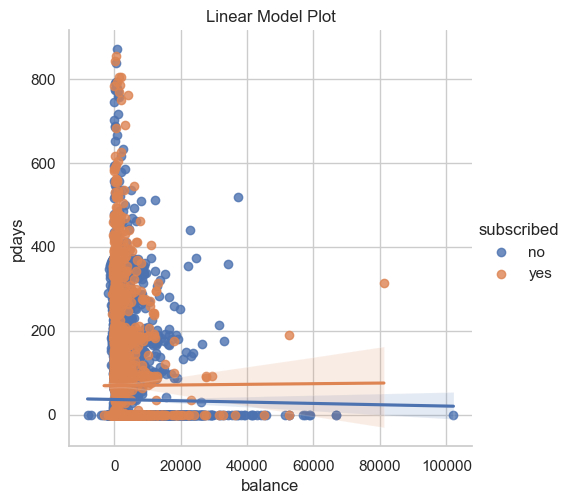

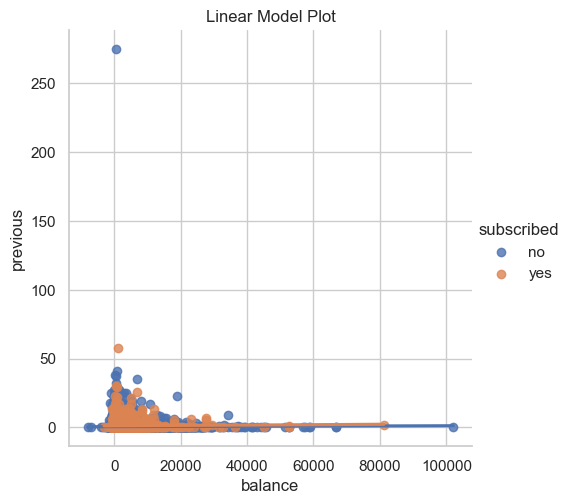

In [33]:
log.append('balance')
re()

Balance feature doesn't have much linear relation with other features. Most of data is concentrated around 0-20000 balance.

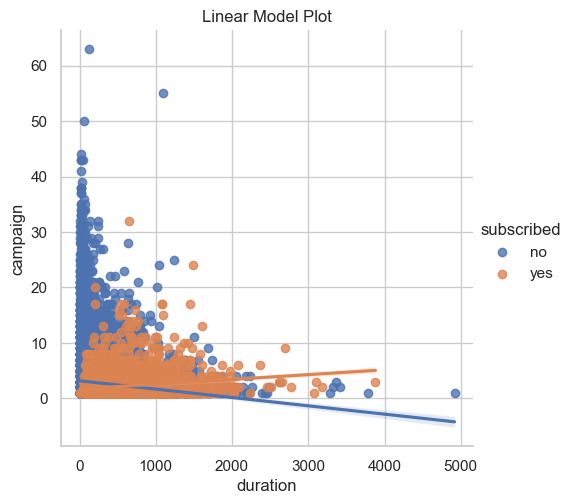

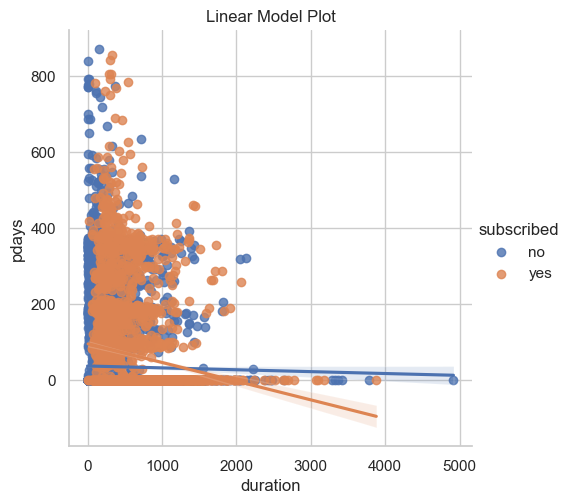

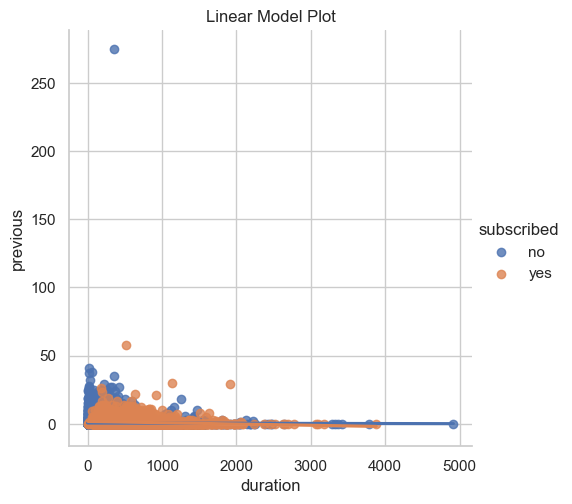

In [34]:
log.append('duration')
re()

Duration feature doesn't have much linear relation with other features. Most of data is concentrated around 0-1500 duration.

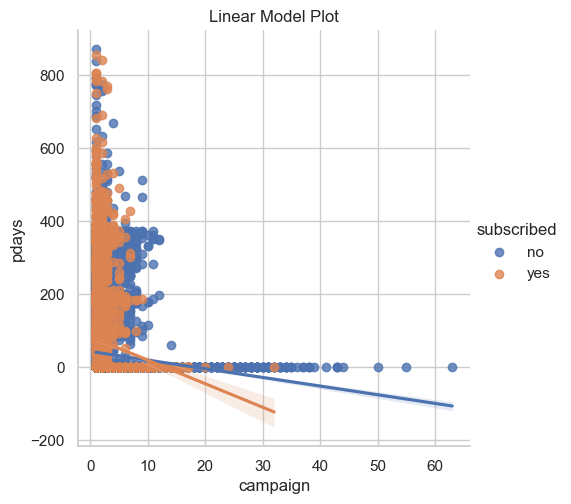

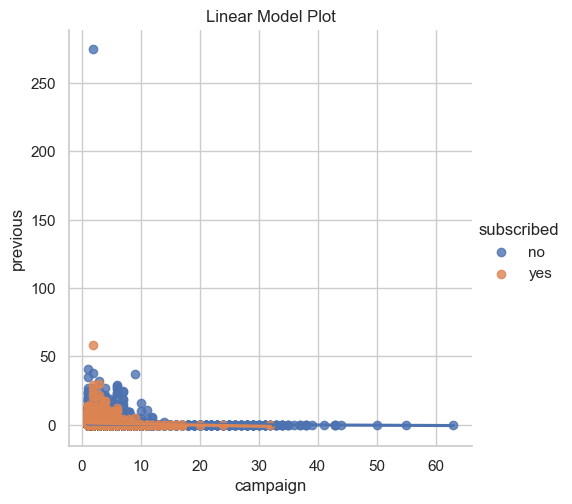

In [35]:
log.append('campaign')
re()

Campaign feature doesn't have much linear relation with other features. Most of data is concentrated around 0-8 campaign.

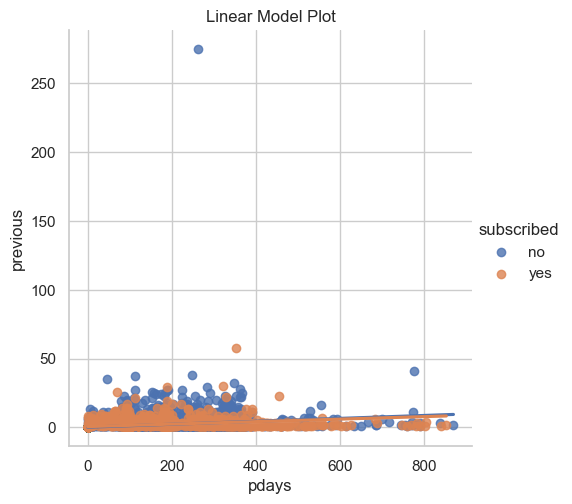

In [36]:
log.append('pdays')
re()

Pdays feature doesn't have much linear relation with previous feature. Most of data is concentrated around 0-400 pdays.

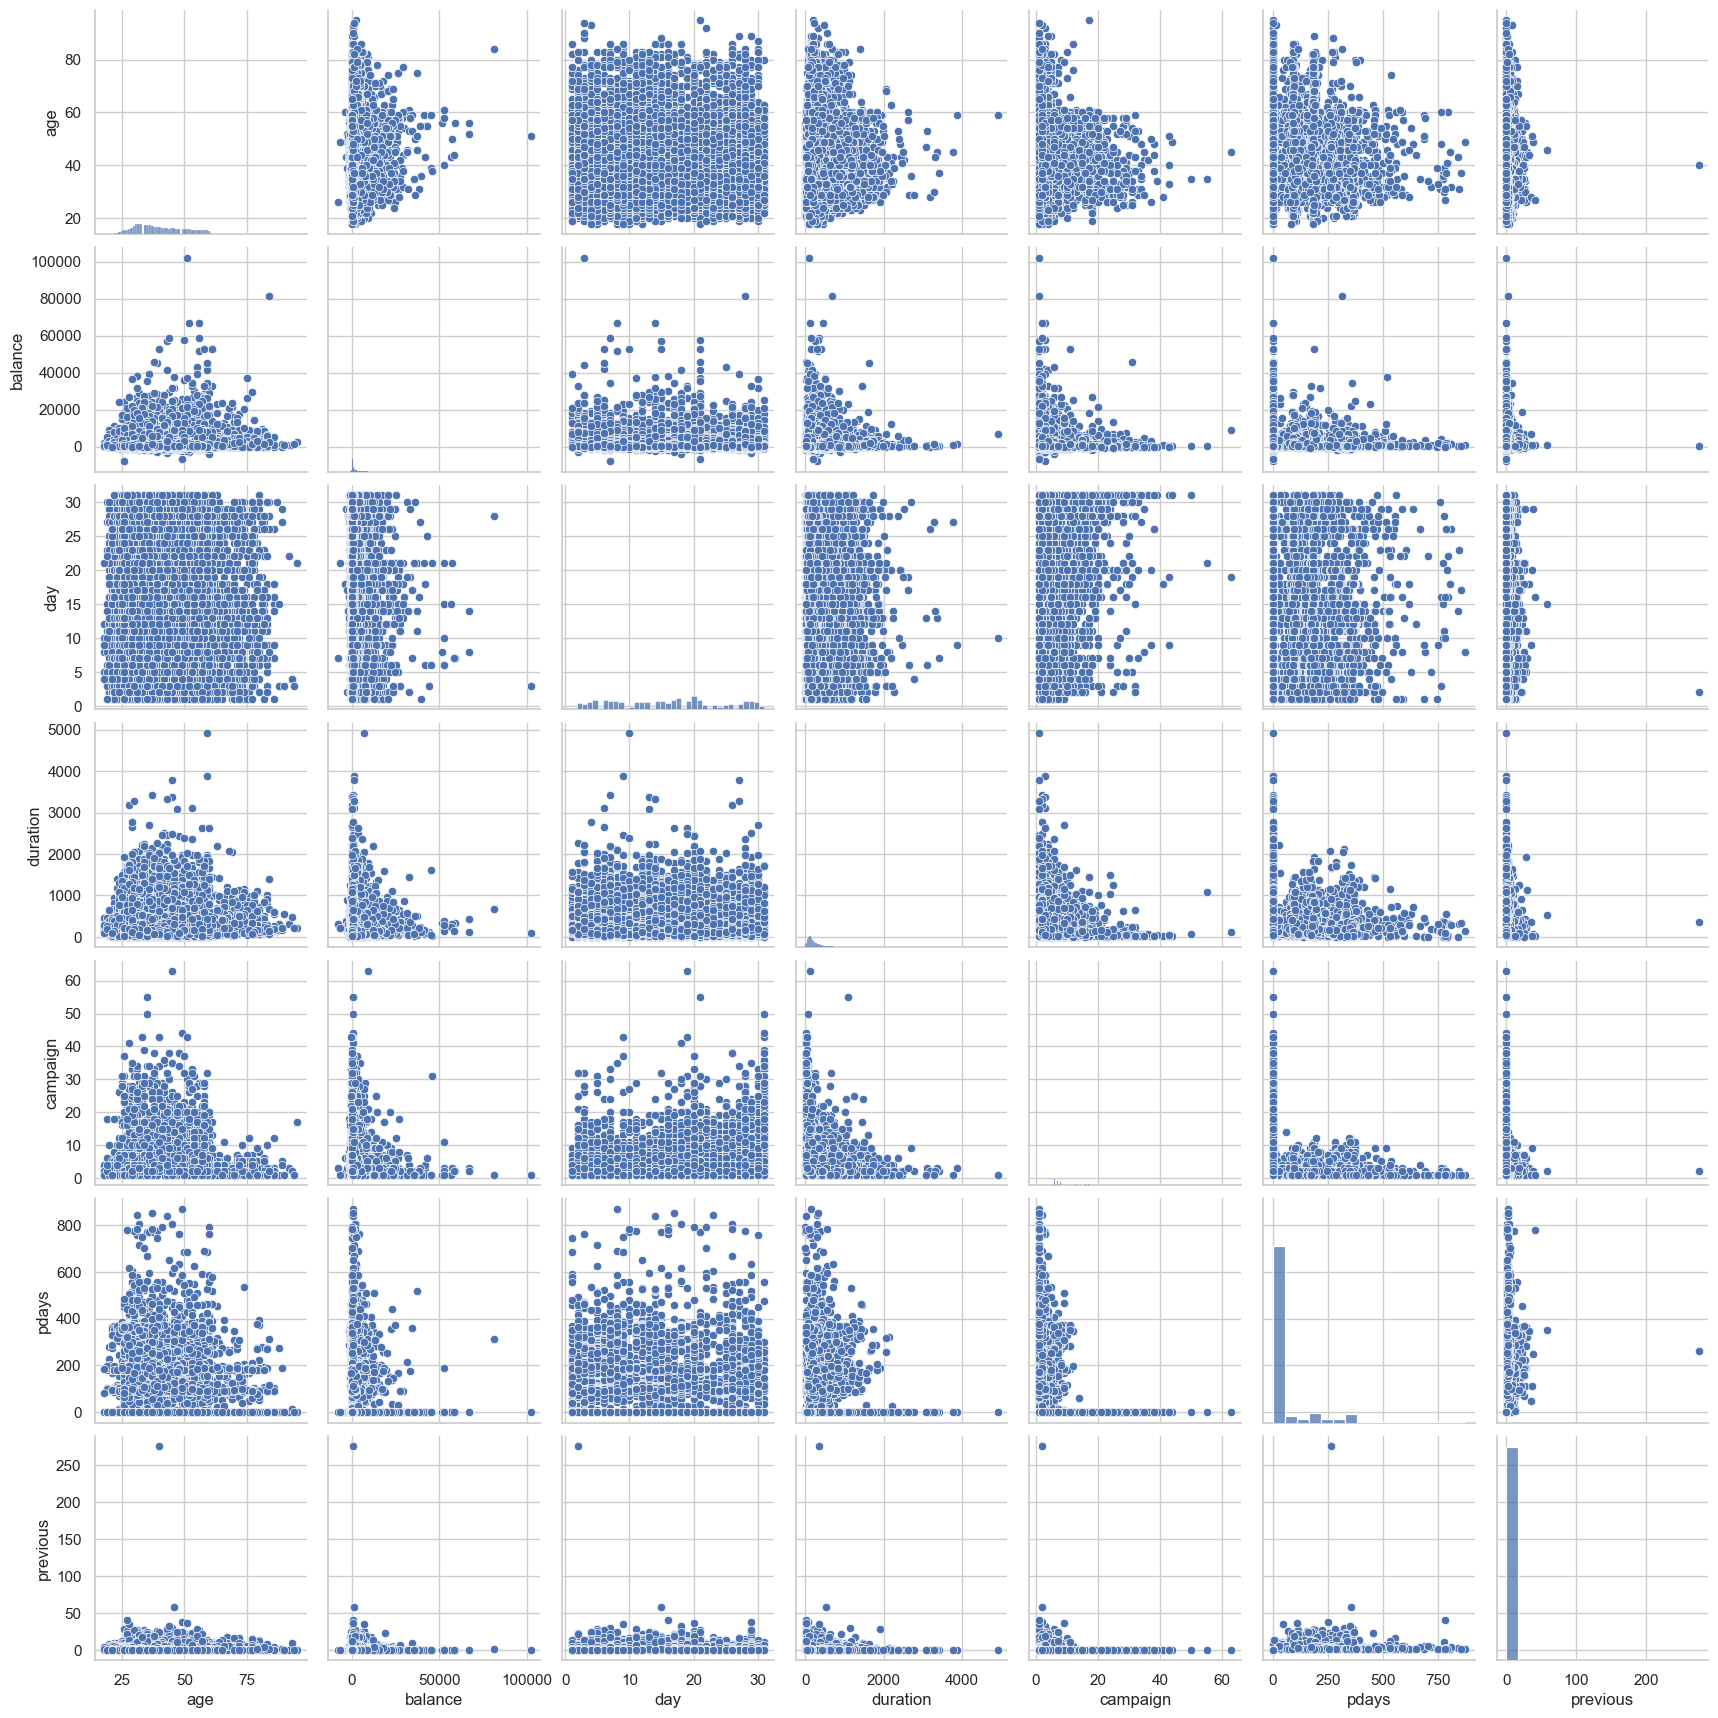

In [37]:
#Visualizing relation between features with multiple plots via Pair plot 
sb.pairplot(data=ds)
plt.show()

This gives pairwise relation ship between the features along with their distribution in the diagonals.

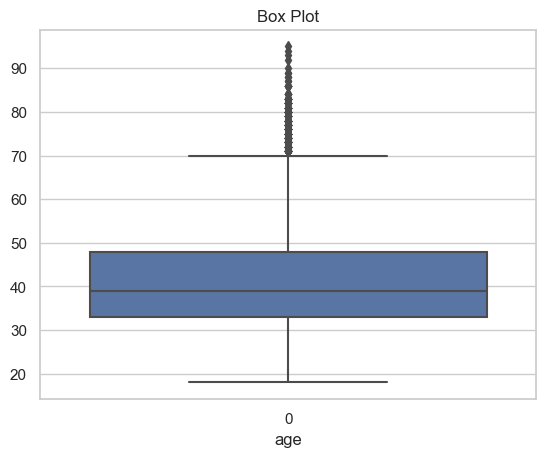

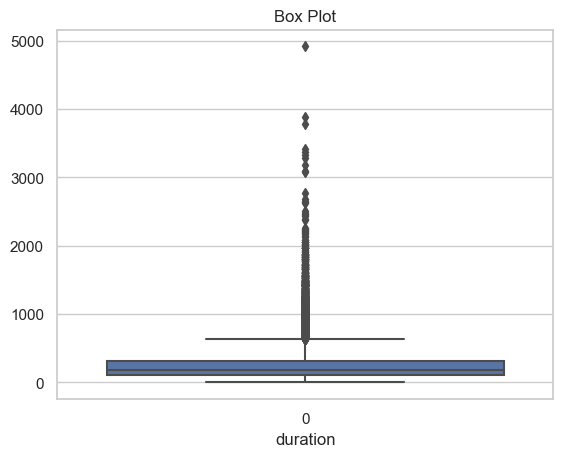

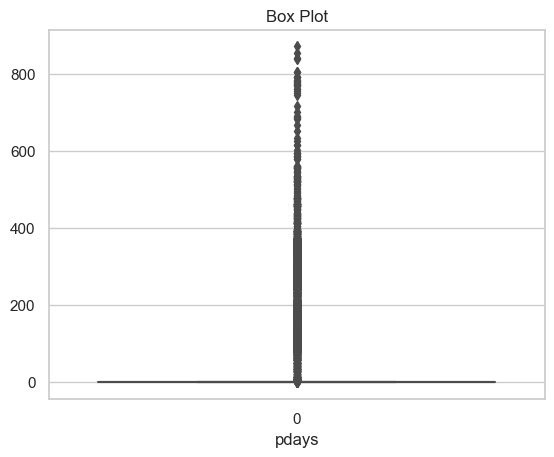

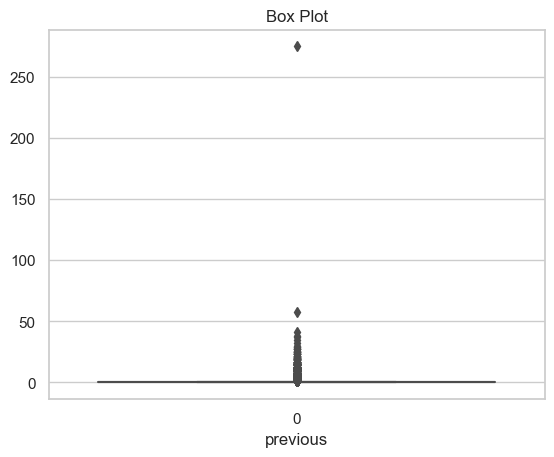

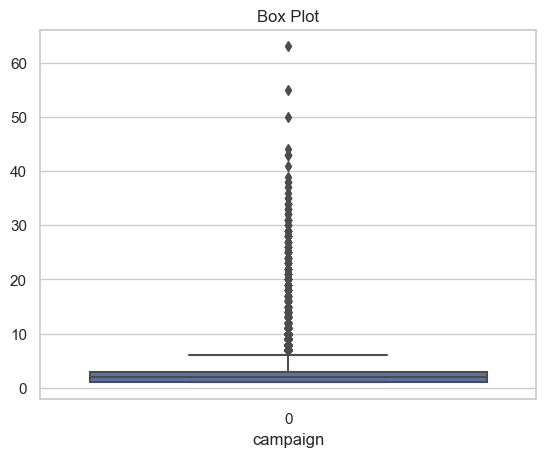

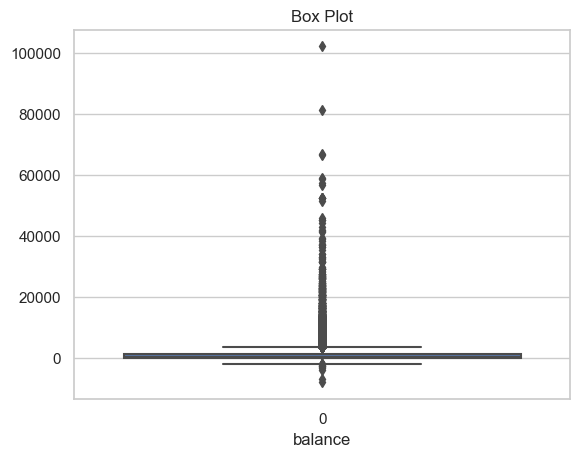

In [38]:
#Checking outliers
a=['age','duration','pdays','previous','campaign','balance']
for i in a:
    sb.boxplot(ds[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

Age,duration,pdays,previous,balance and campaign features contains outliers.

In [39]:
#removing outliers using zscore
#Importing necessary libraries
from scipy.stats import zscore as zs
import numpy as np
f_outlier=ds[a]
z=np.abs(zs(f_outlier))
z

age  duration     pdays  previous  campaign   balance
0      1.415793  0.832754  0.408555  0.237059  0.245906  0.187933
1      0.937156  0.649957  0.408555  0.237059  0.245906  0.449397
2      1.313627  0.070449  0.408555  0.237059  0.567059  0.156159
3      1.509911  2.368149  0.447299  1.001336  0.567059  0.635055
4      0.937156  0.474054  0.408555  0.237059  0.567059  0.411091
...         ...       ...       ...       ...       ...       ...
31642  1.125392  0.552724  0.408555  0.237059  0.245906  0.450388
31643  1.133439  0.699635  0.408555  0.237059  0.245906  0.324903
31644  0.843038  0.859979  0.408555  0.237059  0.075247  0.347358
31645  1.509911  0.918319  2.994723  4.716521  1.359859  0.376088
31646  1.321675  6.669728  0.408555  0.237059  0.245906  0.383022

[31647 rows x 6 columns]

The variables z holds the zscores values of these features.

In [40]:
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([4, 5, 2, ..., 2, 3, 1], dtype=int64))

These are the index of  ouliers present in the features.

In [41]:
z.iloc[21,4]

9.70983664417751

In [42]:
z.iloc[26,5]

5.299785542835557

In [43]:
z.iloc[31645,3]

4.716520947865907

In [44]:
z.iloc[31646,1]

6.669727796907274

We have confirmed that these values holds outliers as per the threshold value.

In [45]:
#Removing outliers
zscore=ds[(z<3).all(axis=1)]

In [46]:
#Using IQR method to verify that can it remove outliers with less data loss than zscore method?
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=ds[~((ds< (q1-1.5*iqr)) | (ds>(q3+1.5*iqr))).any(axis=1)]

In [47]:
print('Data loss percentage after removing outliers via zscore',((ds.shape[0]-zscore.shape[0])/ds.shape[0])*100)
print('Data loss percentage after removing outliers via IQR',((ds.shape[0]-IQR.shape[0])/ds.shape[0])*100)

Data loss percentage after removing outliers via zscore 11.132176825607482
Data loss percentage after removing outliers via IQR 37.437987802951305


We can observe that zscore method performed well here, hence, we will update the dataframe with zscore method.

In [48]:
outliers=ds.shape[0]-zscore.shape[0]#storing number of outliers removed
print(f'Outliers removed : {outliers}')#printing
ds=zscore#Updating dataframe

Outliers removed : 3523


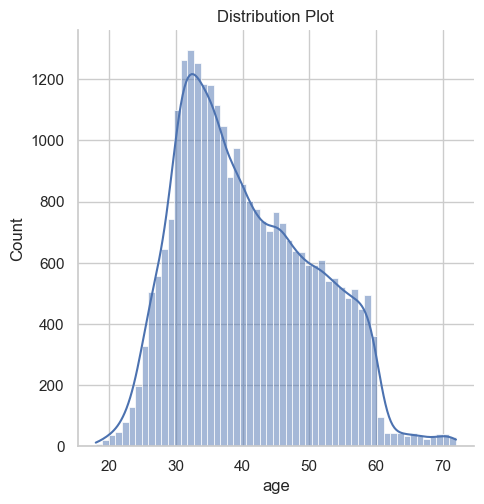

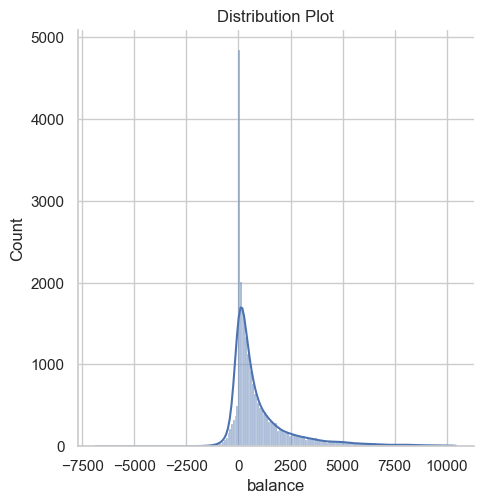

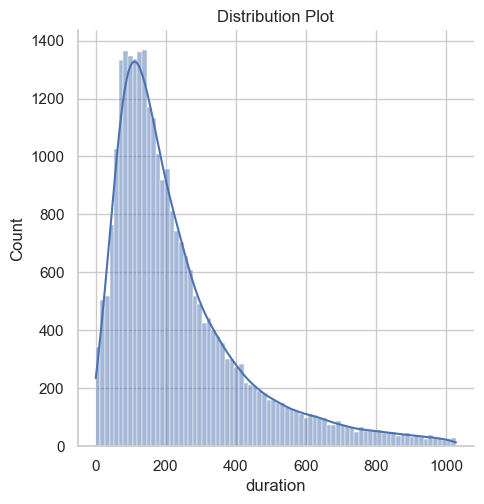

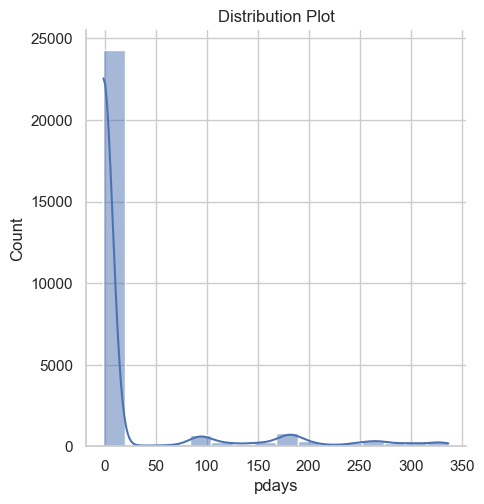

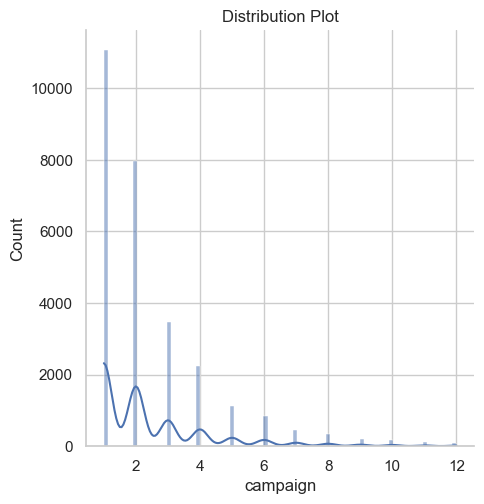

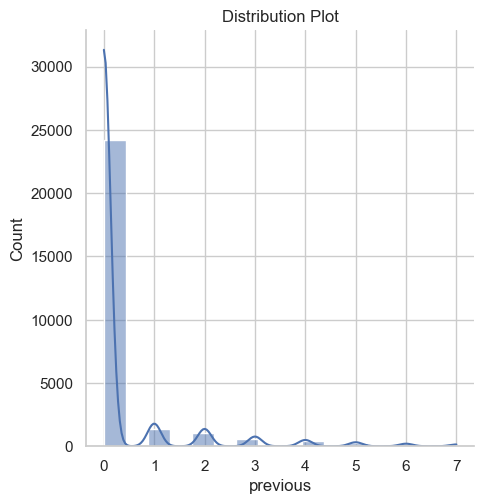

In [49]:
#checking distribution of columns
a=['age','balance','duration','pdays','campaign','previous']
for i in a:
    sb.displot(ds[i],kde=True)
    plt.title('Distribution Plot')    

***Balance,duration,pdays,campaign and previous features are skewed to right***. Rest of the features are almost normally distributed.

In [50]:
ds.skew()#checking skewness

age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

Balance,duration,campaign,pdays and previous features do not fall under the accpetable range , thus , we can use yeojohnson method to remove skewness.

In [51]:
a=['balance','duration','campaign','pdays','previous']
from scipy.stats import yeojohnson as yj
for i in a:
    ds[i],p=yj(ds[i])
ds.skew()

age         0.438496
balance     0.191870
day         0.073752
duration    0.003789
campaign    0.205447
pdays       2.080726
previous    2.079774
dtype: float64

There is still skewness in pdays and previous features.We can try log on  method 'pdays' column.

In [52]:
ds['t_pdays']=np.log(ds['pdays'])#creating a temprorary column to compare
ds.skew()

age         0.438496
balance     0.191870
day         0.073752
duration    0.003789
campaign    0.205447
pdays       2.080726
previous    2.079774
t_pdays    -9.532304
dtype: float64

In [53]:
#Log method is not working well on 'pdays' column ,thus, we can discard it.
ds.drop('t_pdays',axis=1,inplace=True)
ds.skew()

age         0.438496
balance     0.191870
day         0.073752
duration    0.003789
campaign    0.205447
pdays       2.080726
previous    2.079774
dtype: float64

Temporary column is removed succesfully. Using log + 1 method on 'previous' feature.

In [54]:
ds['previous']=np.log1p(ds['previous'])
ds.skew()

age         0.438496
balance     0.191870
day         0.073752
duration    0.003789
campaign    0.205447
pdays       2.080726
previous    2.079741
dtype: float64

In [55]:
ds['previous']=np.sqrt(ds['previous'])
ds['T_pdays']=np.sqrt(ds['pdays'])#creating a temprorary column to compare
ds.skew()

age         0.438496
balance     0.191870
day         0.073752
duration    0.003789
campaign    0.205447
pdays       2.080726
previous    2.079585
T_pdays    -8.920706
dtype: float64

In [56]:
#square root method is not working well on 'pdays' column ,thus, we can discard it.
ds.drop('T_pdays',axis=1,inplace=True)
ds.skew()

age         0.438496
balance     0.191870
day         0.073752
duration    0.003789
campaign    0.205447
pdays       2.080726
previous    2.079585
dtype: float64

Temporary column is removed succesfully. Using cuberoot method.

In [57]:
a=['pdays','previous']
for i in a:
    ds[i]=np.cbrt(ds[i])
ds.skew()

age         0.438496
balance     0.191870
day         0.073752
duration    0.003789
campaign    0.205447
pdays       2.079842
previous    2.079538
dtype: float64

There is still skewness in pdays and previous features. As some of the data are not positive,hence, we can not apply other methods. Therefore,we can accept these skewness values as thresholds values.

In [58]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds

age          job   marital  education default      balance housing  \
0       56       admin.   married  secondary      no   860.793508      no   
1       31  blue-collar   married  secondary      no     2.702714      no   
2       27     services   married  secondary      no   436.555206     yes   
3       57   management  divorced   tertiary      no  1370.662210      no   
4       31   technician   married  secondary      no    74.422131     yes   
...    ...          ...       ...        ...     ...          ...     ...   
31640   43   management    single  secondary      no  1253.389583      no   
31641   37   technician    single   tertiary      no   611.669038      no   
31642   29   management    single   tertiary      no     0.000000     yes   
31643   53   management  divorced   tertiary      no   206.670246      no   
31644   32   management    single   tertiary      no   173.805192      no   

      loan    contact  day month   duration  campaign     pdays  previous  \
0       no  telephone   19   nov   5.716736  0.651092 -1.291482 -0.000000   
1       no   cellular   20   jul   7.369063  0.651092 -1.291482 -0.000000   
2       no   cellular   18   jul  10.004533  0.492000 -1.291482 -0.000000   
3       no   cellular   22   jun  14.403469  0.492000  1.057162  0.731163   
4       no   cellular    4   feb  11.448528  0.492000 -1.291482 -0.000000   
...    ...        ...  ...   ...        ...       ...       ...       ...   
31640   no   cellular   20   jun   4.945273  0.775380 -1.291482 -0.000000   
31641   no   cellular    6   jun  11.953695  0.651092 -1.291482 -0.000000   
31642   no   cellular   12   may   7.979971  0.651092 -1.291482 -0.000000   
31643  yes   cellular    5   jun  11.922870  0.651092 -1.291482 -0.000000   
31644   no   cellular    7   aug   5.359571  0.729168 -1.291482 -0.000000   

      poutcome subscribed  
0      failure         no  
1      failure         no  
2      failure         no  
3      success        yes  
4      failure         no  
...        ...        ...  
31640  failure         no  
31641  failure         no  
31642  failure         no  
31643  failure        yes  
31644  failure         no  

[28124 rows x 17 columns]

In [59]:
a=[]#creating empty list
for i in col:#iterating 'col' variable
    if ds[i].dtypes =='object': #using if condition to append catagorical columns
        a.append(i)#appending

encoded_ds=pd.DataFrame()#creating empty dataframe


for i in a:#iterating 'a' variable
    encoded_ds[i]=ds[i] #creating new catagorical columns in 'encoded_ds' from 'ds' data frame
    ds[i]=le.fit_transform(ds[i])#encoding columns
    encoded_ds['Encoded_'+i]=le.fit_transform(ds[i])#adding encoded colums in 'encoded_ds' data frame
ds

age  job  marital  education  default      balance  housing  loan  \
0       56    0        1          1        0   860.793508        0     0   
1       31    1        1          1        0     2.702714        0     0   
2       27    7        1          1        0   436.555206        1     0   
3       57    4        0          2        0  1370.662210        0     0   
4       31    9        1          1        0    74.422131        1     0   
...    ...  ...      ...        ...      ...          ...      ...   ...   
31640   43    4        2          1        0  1253.389583        0     0   
31641   37    9        2          2        0   611.669038        0     0   
31642   29    4        2          2        0     0.000000        1     0   
31643   53    4        0          2        0   206.670246        0     1   
31644   32    4        2          2        0   173.805192        0     0   

       contact  day  month   duration  campaign     pdays  previous  poutcome  \
0            1   19      9   5.716736  0.651092 -1.291482 -0.000000         0   
1            0   20      5   7.369063  0.651092 -1.291482 -0.000000         0   
2            0   18      5  10.004533  0.492000 -1.291482 -0.000000         0   
3            0   22      6  14.403469  0.492000  1.057162  0.731163         2   
4            0    4      3  11.448528  0.492000 -1.291482 -0.000000         0   
...        ...  ...    ...        ...       ...       ...       ...       ...   
31640        0   20      6   4.945273  0.775380 -1.291482 -0.000000         0   
31641        0    6      6  11.953695  0.651092 -1.291482 -0.000000         0   
31642        0   12      8   7.979971  0.651092 -1.291482 -0.000000         0   
31643        0    5      6  11.922870  0.651092 -1.291482 -0.000000         0   
31644        0    7      1   5.359571  0.729168 -1.291482 -0.000000         0   

       subscribed  
0               0  
1               0  
2               0  
3               1  
4               0  
...           ...  
31640           0  
31641           0  
31642           0  
31643           1  
31644           0  

[28124 rows x 17 columns]

All the catagorical data have been encoded. ***In target variable, '0' represents 'no' and '1' represents 'yes'***.

In [174]:
encoded_ds.to_csv(r'D:\Files\encoded_ds.csv')#exporting 'encoded_ds' as csv file

In [60]:
#Checking correlation between independant and dependant varibales
cor=ds.corr()
cor

age       job   marital  education   default   balance  \
age         1.000000 -0.043483 -0.411087  -0.153270 -0.009616  0.083851   
job        -0.043483  1.000000  0.067531   0.187598 -0.006272  0.020978   
marital    -0.411087  0.067531  1.000000   0.119141 -0.012221  0.021335   
education  -0.153270  0.187598  0.119141   1.000000 -0.008455  0.045106   
default    -0.009616 -0.006272 -0.012221  -0.008455  1.000000 -0.165815   
balance     0.083851  0.020978  0.021335   0.045106 -0.165815  1.000000   
housing    -0.155557 -0.104534 -0.026593  -0.083799 -0.014763 -0.074765   
loan        0.005488 -0.030961 -0.045159  -0.025643  0.081270 -0.126957   
contact     0.119092 -0.011731 -0.008349  -0.061563 -0.015050  0.043306   
day        -0.009937  0.024533 -0.008386   0.018975  0.007138 -0.003934   
month      -0.042070 -0.087593 -0.003321  -0.075769  0.007290  0.013609   
duration   -0.030918 -0.001020  0.015781   0.004372 -0.000182  0.021114   
campaign    0.042220  0.010571 -0.036486  -0.006741  0.012027 -0.017344   
pdays      -0.002340  0.018530  0.025451   0.065780 -0.040642  0.075569   
previous   -0.002234  0.018568  0.025460   0.065906 -0.040671  0.075472   
poutcome   -0.004614  0.021870  0.035395   0.068266 -0.028877  0.054268   
subscribed -0.007172  0.036981  0.056387   0.079853 -0.014500  0.075420   

             housing      loan   contact       day     month  duration  \
age        -0.155557  0.005488  0.119092 -0.009937 -0.042070 -0.030918   
job        -0.104534 -0.030961 -0.011731  0.024533 -0.087593 -0.001020   
marital    -0.026593 -0.045159 -0.008349 -0.008386 -0.003321  0.015781   
education  -0.083799 -0.025643 -0.061563  0.018975 -0.075769  0.004372   
default    -0.014763  0.081270 -0.015050  0.007138  0.007290 -0.000182   
balance    -0.074765 -0.126957  0.043306 -0.003934  0.013609  0.021114   
housing     1.000000  0.031251 -0.071047 -0.015138  0.274293  0.011521   
loan        0.031251  1.000000 -0.009698  0.011949  0.026898 -0.004871   
contact    -0.071047 -0.009698  1.000000  0.023355 -0.009471 -0.075509   
day        -0.015138  0.011949  0.023355  1.000000  0.017204 -0.040852   
month       0.274293  0.026898 -0.009471  0.017204  1.000000  0.001373   
duration    0.011521 -0.004871 -0.075509 -0.040852  0.001373  1.000000   
campaign   -0.043984 -0.001155  0.058028  0.124598 -0.136760 -0.089521   
pdays       0.013392 -0.017879  0.009485 -0.048760 -0.020441  0.028876   
previous    0.013122 -0.017894  0.009565 -0.048680 -0.020603  0.028784   
poutcome   -0.078884 -0.046037  0.006170 -0.028284 -0.004626  0.057513   
subscribed -0.145640 -0.074803  0.003211 -0.030122 -0.022564  0.317504   

            campaign     pdays  previous  poutcome  subscribed  
age         0.042220 -0.002340 -0.002234 -0.004614   -0.007172  
job         0.010571  0.018530  0.018568  0.021870    0.036981  
marital    -0.036486  0.025451  0.025460  0.035395    0.056387  
education  -0.006741  0.065780  0.065906  0.068266    0.079853  
default     0.012027 -0.040642 -0.040671 -0.028877   -0.014500  
balance    -0.017344  0.075569  0.075472  0.054268    0.075420  
housing    -0.043984  0.013392  0.013122 -0.078884   -0.145640  
loan       -0.001155 -0.017879 -0.017894 -0.046037   -0.074803  
contact     0.058028  0.009485  0.009565  0.006170    0.003211  
day         0.124598 -0.048760 -0.048680 -0.028284   -0.030122  
month      -0.136760 -0.020441 -0.020603 -0.004626   -0.022564  
duration   -0.089521  0.028876  0.028784  0.057513    0.317504  
campaign    1.000000 -0.110432 -0.110446 -0.069723   -0.082516  
pdays      -0.110432  1.000000  0.999962  0.585253    0.186205  
previous   -0.110446  0.999962  1.000000  0.585964    0.186248  
poutcome   -0.069723  0.585253  0.585964  1.000000    0.302750  
subscribed -0.082516  0.186205  0.186248  0.302750    1.000000

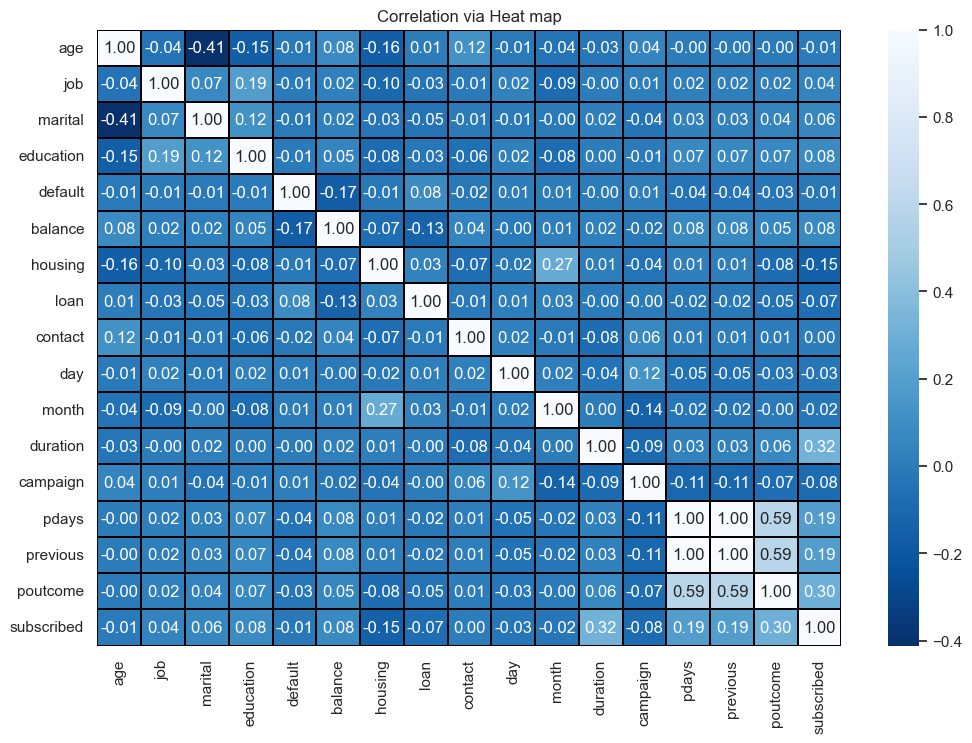

In [61]:
#Visualizing correlation
plt.figure(figsize=(12,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.2f')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:     
1)Features do not have much correlation with target variable.  
2)***Job,martial,education,balance,duration,pdays,previous and poutcome features*** have ***low  positve correlation*** with the target variable.      
3)***Age,default,housing,loan,day,month and campaign features*** have ***low negative correlation*** with the target variable.  
4)***Contact feature does not have correlation with target variable***,thus it can dropped.  
5)***Pdays and previous features*** have ***high positive correlation*** with each other.

In [62]:
ds.drop('contact',axis=1,inplace=True)#dropping  contact feature
ds

age  job  marital  education  default      balance  housing  loan  day  \
0       56    0        1          1        0   860.793508        0     0   19   
1       31    1        1          1        0     2.702714        0     0   20   
2       27    7        1          1        0   436.555206        1     0   18   
3       57    4        0          2        0  1370.662210        0     0   22   
4       31    9        1          1        0    74.422131        1     0    4   
...    ...  ...      ...        ...      ...          ...      ...   ...  ...   
31640   43    4        2          1        0  1253.389583        0     0   20   
31641   37    9        2          2        0   611.669038        0     0    6   
31642   29    4        2          2        0     0.000000        1     0   12   
31643   53    4        0          2        0   206.670246        0     1    5   
31644   32    4        2          2        0   173.805192        0     0    7   

       month   duration  campaign     pdays  previous  poutcome  subscribed  
0          9   5.716736  0.651092 -1.291482 -0.000000         0           0  
1          5   7.369063  0.651092 -1.291482 -0.000000         0           0  
2          5  10.004533  0.492000 -1.291482 -0.000000         0           0  
3          6  14.403469  0.492000  1.057162  0.731163         2           1  
4          3  11.448528  0.492000 -1.291482 -0.000000         0           0  
...      ...        ...       ...       ...       ...       ...         ...  
31640      6   4.945273  0.775380 -1.291482 -0.000000         0           0  
31641      6  11.953695  0.651092 -1.291482 -0.000000         0           0  
31642      8   7.979971  0.651092 -1.291482 -0.000000         0           0  
31643      6  11.922870  0.651092 -1.291482 -0.000000         0           1  
31644      1   5.359571  0.729168 -1.291482 -0.000000         0           0  

[28124 rows x 16 columns]

Contact feature is dropped successfully.

In [63]:
#Separating features and target variable 
x=ds.drop('subscribed',axis=1)
y=ds['subscribed']

In [64]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape[0],'\nDimensions of label:',y.shape[0])

Dimensions of features: 28124 
Dimensions of label: 28124


We can observe that both label and features have same number of dimensions.

In [65]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

age       job   marital  education   default   balance   housing  \
0      1.522811 -1.315336 -0.276906  -0.219726 -0.139916  0.575980 -1.106956   
1     -0.957368 -1.008091 -0.276906  -0.219726 -0.139916 -0.565648 -1.106956   
2     -1.354197  0.835373 -0.276906  -0.219726 -0.139916  0.011562  0.903378   
3      1.622018 -0.086359 -1.927894   1.316337 -0.139916  1.254324 -1.106956   
4     -0.957368  1.449861 -0.276906  -0.219726 -0.139916 -0.470230  0.903378   
...         ...       ...       ...        ...       ...       ...       ...   
28119  0.233118 -0.086359  1.374081  -0.219726 -0.139916  1.098301 -1.106956   
28120 -0.362125  1.449861  1.374081   1.316337 -0.139916  0.244538 -1.106956   
28121 -1.155782 -0.086359  1.374081   1.316337 -0.139916 -0.569243  0.903378   
28122  1.225189 -0.086359 -1.927894   1.316337 -0.139916 -0.294284 -1.106956   
28123 -0.858161 -0.086359  1.374081   1.316337 -0.139916 -0.338008 -1.106956   

           loan       day     month  duration  campaign     pdays  previous  \
0     -0.447423  0.374734  1.175534 -1.507305  0.170750 -0.402841 -0.402856   
1     -0.447423  0.493893 -0.164394 -0.799331  0.170750 -0.402841 -0.402856   
2     -0.447423  0.255575 -0.164394  0.329891 -1.104918 -0.402841 -0.402856   
3     -0.447423  0.732212  0.170588  2.214706 -1.104918  2.480935  2.484725   
4     -0.447423 -1.412653 -0.834358  0.948600 -1.104918 -0.402841 -0.402856   
...         ...       ...       ...       ...       ...       ...       ...   
28119 -0.447423  0.493893  0.170588 -1.837854  1.167351 -0.402841 -0.402856   
28120 -0.447423 -1.174334  0.170588  1.165050  0.170750 -0.402841 -0.402856   
28121 -0.447423 -0.459380  0.840552 -0.537575  0.170750 -0.402841 -0.402856   
28122  2.235019 -1.293493  0.170588  1.151842  0.170750 -0.402841 -0.402856   
28123 -0.447423 -1.055175 -1.504322 -1.660340  0.796802 -0.402841 -0.402856   

       poutcome  
0     -0.236048  
1     -0.236048  
2     -0.236048  
3      5.102595  
4     -0.236048  
...         ...  
28119 -0.236048  
28120 -0.236048  
28121 -0.236048  
28122 -0.236048  
28123 -0.236048  

[28124 rows x 15 columns]

The data is scaled using StandarScaler method to overcome the issue of biasness.

In [66]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

VIF   Features
0       1.281829        age
1       1.051491        job
2       1.227025    marital
3       1.080896  education
4       1.034322    default
5       1.066245    balance
6       1.152780    housing
7       1.025519       loan
8       1.021094        day
9       1.114586      month
10      1.013599   duration
11      1.057886   campaign
12  13244.009760      pdays
13  13260.608134   previous
14      1.566019   poutcome

Here we can observe that pdays and previous features pose multicollineraity problem, hence, we can drop previous feature.

In [67]:
x.drop('previous',axis=1,inplace=True)#droping previous feature
x

age       job   marital  education   default   balance   housing  \
0      1.522811 -1.315336 -0.276906  -0.219726 -0.139916  0.575980 -1.106956   
1     -0.957368 -1.008091 -0.276906  -0.219726 -0.139916 -0.565648 -1.106956   
2     -1.354197  0.835373 -0.276906  -0.219726 -0.139916  0.011562  0.903378   
3      1.622018 -0.086359 -1.927894   1.316337 -0.139916  1.254324 -1.106956   
4     -0.957368  1.449861 -0.276906  -0.219726 -0.139916 -0.470230  0.903378   
...         ...       ...       ...        ...       ...       ...       ...   
28119  0.233118 -0.086359  1.374081  -0.219726 -0.139916  1.098301 -1.106956   
28120 -0.362125  1.449861  1.374081   1.316337 -0.139916  0.244538 -1.106956   
28121 -1.155782 -0.086359  1.374081   1.316337 -0.139916 -0.569243  0.903378   
28122  1.225189 -0.086359 -1.927894   1.316337 -0.139916 -0.294284 -1.106956   
28123 -0.858161 -0.086359  1.374081   1.316337 -0.139916 -0.338008 -1.106956   

           loan       day     month  duration  campaign     pdays  poutcome  
0     -0.447423  0.374734  1.175534 -1.507305  0.170750 -0.402841 -0.236048  
1     -0.447423  0.493893 -0.164394 -0.799331  0.170750 -0.402841 -0.236048  
2     -0.447423  0.255575 -0.164394  0.329891 -1.104918 -0.402841 -0.236048  
3     -0.447423  0.732212  0.170588  2.214706 -1.104918  2.480935  5.102595  
4     -0.447423 -1.412653 -0.834358  0.948600 -1.104918 -0.402841 -0.236048  
...         ...       ...       ...       ...       ...       ...       ...  
28119 -0.447423  0.493893  0.170588 -1.837854  1.167351 -0.402841 -0.236048  
28120 -0.447423 -1.174334  0.170588  1.165050  0.170750 -0.402841 -0.236048  
28121 -0.447423 -0.459380  0.840552 -0.537575  0.170750 -0.402841 -0.236048  
28122  2.235019 -1.293493  0.170588  1.151842  0.170750 -0.402841 -0.236048  
28123 -0.447423 -1.055175 -1.504322 -1.660340  0.796802 -0.402841 -0.236048  

[28124 rows x 14 columns]

Previous feature is dropped successfully.

In [68]:
#Checking varience inflation factor
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

VIF   Features
0   1.281641        age
1   1.051489        job
2   1.227016    marital
3   1.080771  education
4   1.034293    default
5   1.066017    balance
6   1.152585    housing
7   1.025514       loan
8   1.021007        day
9   1.114348      month
10  1.013370   duration
11  1.057833   campaign
12  1.554959      pdays
13  1.549764   poutcome

Now the multicollineraity problem is solved.

In [69]:
y.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

As the data in target variable is not balanced , we can use oversampling method.

In [70]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [71]:
y1.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

The data is balanced now.

In [72]:
#checking how much data is sampled  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])
#Updating
x=x1
y=y1

Dimensions of features before sampling: 28124 
Dimensions of label before sampling: 28124 
Dimensions of features after sampling: 50528 
Dimensions of label after sampling: 50528 
Differnce =  22404


In [77]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score 
#Finding best random state
ac_updater=0
rs_updater=0
for i in range(1,45):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
    RFR=rfc()
    RFR.fit(x_train,y_train)
    pr=RFR.predict(x_test)
    ac=accuracy_score(y_test,pr)
    if ac>ac_updater:
        ac_updater=ac
        rs_updater=i
print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)

Max accuracy score during the iteration is  0.9532950722343162 on randome state :  10


In [81]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#spliting data

In [82]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.model_selection import cross_val_score as cvs

#Creating instance
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

log=float('inf')#Initializing 'log' variable  to positive infinity

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list
    
for i in models:#Iterating models 
    i.fit(x_train,y_train)
    pr=i.predict(x_test)
    A_score=accuracy_score(y_test,pr)
    C_matrix=confusion_matrix(y_test,pr)
    C_report=classification_report(y_test,pr)
    score=cvs(i,x,y)
    diff=abs(A_score - score.mean())*100
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','Confusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\n','Classification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.8177980077841547 
 Confusion matrix of LogisticRegression :
 [[6071 1458]
 [1304 6326]] 
 Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      7529
           1       0.81      0.83      0.82      7630

    accuracy                           0.82     15159
   macro avg       0.82      0.82      0.82     15159
weighted avg       0.82      0.82      0.82     15159
 


Cross validation Score of LogisticRegression is [0.80566    0.80605581 0.80437364 0.8154379  0.80564077] 
Mean:  0.8074336251469211 
Difference between Accuracy score and cross validation is  1.0364382637233605

 Accuracy score of RandomForestClassifier is 0.950920245398773 
 Confusion matrix of RandomForestClassifier :
 [[7009  520]
 [ 224 7406]] 
 Classification report of  RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.97      

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that ExtraTreesClassifier is the best performing model.

In [86]:
#Using GridSearchCV 
from sklearn.model_selection import GridSearchCV as GSC#Importing required library
pa={'max_features':['auto','sqrt','log2',None],'criterion':['gini','entropy','log_loss'],'max_depth':[None, 10, 20],'min_samples_split':[2, 5, 10]}
gsc=GSC(ETC,pa,n_jobs=-1)
gsc.fit(x_train,y_train)
gsc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2}

In [87]:
#Creating new model with best parameters provided by GridSearchCV
final=ExtraTreesClassifier(criterion='gini',max_depth=None,max_features='auto',min_samples_split=2)
final.fit(x_train,y_train)
pr=final.predict(x_test)
ac=accuracy_score(y_test,pr)
print(ac)

0.9643775974668514


Model accuracy is slightly increased. Accuracy - **96.43%**

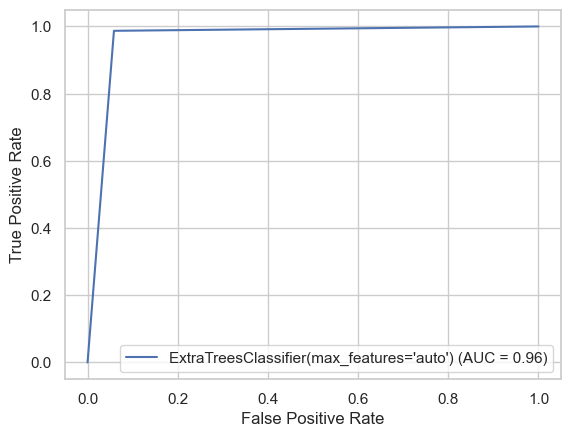

In [88]:
#Plotimg roc curve
#Importing necessary libraries
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,pr)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()
plt.show()

Here the AUC value is 0.96.

In [89]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\BM.obj')

['D:\\Models\\BM.obj']

In [90]:
#importing test dataset
ds2=pd.read_csv(r'D:\Files\termdeposit_test.csv')
ds2

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

This data frame contains ***test data of clients***. It contains **13564 rows and 17 columns**. All columns are features.The data frame contains both numeric data as well as catagorical data.This data frame do not contains target variable.  

In [91]:
ds2['ID'].nunique()#Checking number of unique values present in ID feature.

13564

All of the values are unique and it does not contribute towards the analysis, hence, we can drop it.

In [92]:
ds2.drop('ID',axis=1,inplace=True)#dropping columns
ds2

age            job   marital  education default  balance housing loan  \
0       32       services   married  secondary      no      118     yes   no   
1       78        retired  divorced    primary      no     2787      no   no   
2       31  self-employed    single   tertiary      no      144     yes   no   
3       57       services    single    primary      no     3777     yes   no   
4       45    blue-collar  divorced  secondary      no     -705      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
13559   39     management   married   tertiary      no       45      no   no   
13560   54    blue-collar   married    primary      no     2281     yes   no   
13561   35        retired   married    primary      no      285     yes   no   
13562   29         admin.    single  secondary      no      464      no   no   
13563   29         admin.   married  secondary      no        2     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
0       cellular   15   may        20         6     -1         0  unknown  
1      telephone    1   jul       372         1     -1         0  unknown  
2        unknown   16   may       676         1     -1         0  unknown  
3      telephone   13   may        65         2     -1         0  unknown  
4        unknown    3   jul       111         1     -1         0  unknown  
...          ...  ...   ...       ...       ...    ...       ...      ...  
13559   cellular   28   aug       148         4     -1         0  unknown  
13560    unknown   20   jun       158         1     -1         0  unknown  
13561   cellular   29   jan       136         1     -1         0  unknown  
13562   cellular    9   nov       208         2     91         3  success  
13563   cellular    6   may       339         1    362         1  failure  

[13564 rows x 16 columns]

ID feature  is dropped successfully. Now the data frame has 16 columns.

In [93]:
#checking for whitespace characters 
col=ds2.columns.tolist() #Storing columns name into list
space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable
for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not ds2.loc[ds2[i]==space].empty:#Checking if any row contains white space characters
            validation+=1#increasing 1 in 'validation' variable
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [94]:
ds2.dtypes#Checking dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

There are two types of data present in this data frame which are **int64 and object**. Majority of the data have **object** data type.

In [95]:
ds2.isnull().sum() #Checking null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

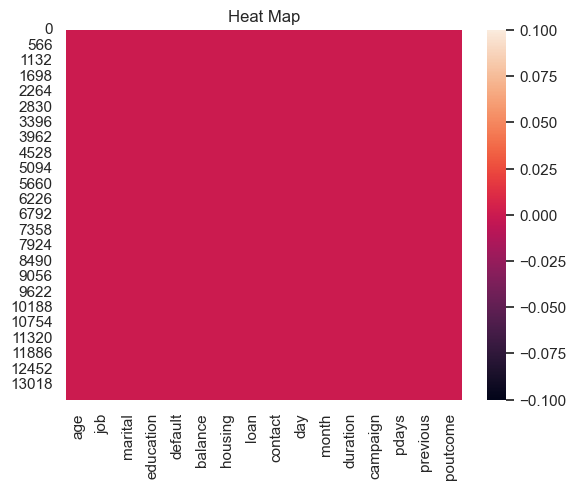

In [96]:
sb.heatmap(ds2.isnull())#Visualizing null values via Heatmap
plt.title('Heat Map')
plt.show()

This data frame do not contains null values,however, there is **'unknown' value present in the data frame which represents null values.**

In [97]:
validation=0#Initilizaing variable
for i in col:#Iterating 'col' variable
    if not ds2.loc[ds2[i]=='unknown'].empty: #Checking if a particular column contains 'unknown' value.
        print(f'{i} column contains "unknown" value.')  #Printing
        validation+=1#increasing 1 in 'validation' variable
if validation==0:
    print('DataFrame does not contains "unknown" values.')

job column contains "unknown" value.
education column contains "unknown" value.
contact column contains "unknown" value.
poutcome column contains "unknown" value.


These are the columns which contains 'unknown' value, now we can replace them with their respected mode value since all these features have catagorical data.

In [98]:
a=['job','education','poutcome','contact']
for i in a:#Itertaing 'a' variable
    mode=ds2[i].mode()[0]#storing mode value in 'mode' variable        
    ds2[i].replace('unknown',mode,inplace=True)#replacing all 'unknown' values present in a column with mode  
    print(f'Using mode value as {mode} of {i} column.')#printing

Using mode value as blue-collar of job column.
Using mode value as secondary of education column.
Using mode value as unknown of poutcome column.
Using mode value as cellular of contact column.


We are getting 'unknown' as a mode in poutcome feature, thus, we can manually select most occuring value.

In [99]:
ds2['poutcome'].value_counts() #checking value counts

unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64

In [100]:
#Using 'failure' as mode value
ds2['poutcome'].replace('unknown','failure',inplace=True)

In [101]:
#Checking again for 'unknown' value 
validation=0#Initilizaing variable
for i in col:#Iterating 'col' variable
    if not ds2.loc[ds2[i]=='unknown'].empty: #Checking if a particular column contains 'unknown' value.
        validation+=1#increasing 1 in 'validation' variable
        print(f'{i} column contains "unknown" value.')  #Printing
    
if validation==0:
    print('DataFrame does not contains "unknown" values.')
ds2

DataFrame does not contains "unknown" values.


age            job   marital  education default  balance housing loan  \
0       32       services   married  secondary      no      118     yes   no   
1       78        retired  divorced    primary      no     2787      no   no   
2       31  self-employed    single   tertiary      no      144     yes   no   
3       57       services    single    primary      no     3777     yes   no   
4       45    blue-collar  divorced  secondary      no     -705      no  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
13559   39     management   married   tertiary      no       45      no   no   
13560   54    blue-collar   married    primary      no     2281     yes   no   
13561   35        retired   married    primary      no      285     yes   no   
13562   29         admin.    single  secondary      no      464      no   no   
13563   29         admin.   married  secondary      no        2     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome  
0       cellular   15   may        20         6     -1         0  failure  
1      telephone    1   jul       372         1     -1         0  failure  
2       cellular   16   may       676         1     -1         0  failure  
3      telephone   13   may        65         2     -1         0  failure  
4       cellular    3   jul       111         1     -1         0  failure  
...          ...  ...   ...       ...       ...    ...       ...      ...  
13559   cellular   28   aug       148         4     -1         0  failure  
13560   cellular   20   jun       158         1     -1         0  failure  
13561   cellular   29   jan       136         1     -1         0  failure  
13562   cellular    9   nov       208         2     91         3  success  
13563   cellular    6   may       339         1    362         1  failure  

[13564 rows x 16 columns]

In [102]:
#checking for duplicates vales in data frame
dup(ds2)

This data frame does not contains duplicate values.


In [103]:
ds2.info()#Checking more information related to datas frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


This shows information related to the columns and about their Non-null count and Dtype. It also shows the memory usage , which is 1.7+MB in this case.

In [104]:
for i in col:#Iterating col variable
    print('\n',i,':-\nUnique values:',ds2[i].unique(),'\nNumber of unique values:',ds2[i].nunique(),'\n\n',ds2[i].value_counts().to_frame('Value Counts'))#Printing


 age :-
Unique values: [32 78 31 57 45 33 37 36 50 34 40 35 53 59 27 46 58 54 51 26 56 38 48 39
 41 29 43 25 42 47 30 44 28 49 20 60 24 52 55 61 62 64 65 63 66 68 77 69
 87 79 21 73 19 82 22 74 83 85 70 23 95 93 67 18 75 71 80 72 81 86 84 92
 76 89 90] 
Number of unique values: 75 

     Value Counts
32           628
34           609
35           580
31           579
33           566
..           ...
95             1
86             1
92             1
89             1
90             1

[75 rows x 1 columns]

 job :-
Unique values: ['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'] 
Number of unique values: 11 

                Value Counts
blue-collar            2972
management             2819
technician             2290
admin.                 1540
services               1251
retired                 690
entrepreneur            479
self-employed           456
unemployed              398
housemaid   

This gives a breif information about unique values, count of unique values and value counts of each column present in the dataset.

In [105]:
ds2.describe()#Using describe function

age       balance           day      duration      campaign  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      40.887128   1358.496535     15.738646    258.278679      2.759510   
std       10.604108   3082.940623      8.288174    258.488648      3.060928   
min       18.000000  -3313.000000      1.000000      0.000000      1.000000   
25%       33.000000     71.000000      8.000000    102.000000      1.000000   
50%       39.000000    445.000000     16.000000    180.000000      2.000000   
75%       48.000000   1413.250000     21.000000    319.000000      3.000000   
max       95.000000  98417.000000     31.000000   3253.000000     58.000000   

              pdays      previous  
count  13564.000000  13564.000000  
mean      41.648555      0.594441  
std      101.985178      1.998193  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      850.000000     55.000000

This gives the statistical information of the numerical columns. From the above description we can observe the following:   
1)All the columns have same count thus there are no missing values.    
2)Mean is greater than 50% in age,balance, duration and pdays features which means that the data is skewed to the right in this column.  
3)There is a huge jump between 75% and max in  age, balance,duration, campaign ,previous and pdays features, hence, there might be outliers present in these columns. 

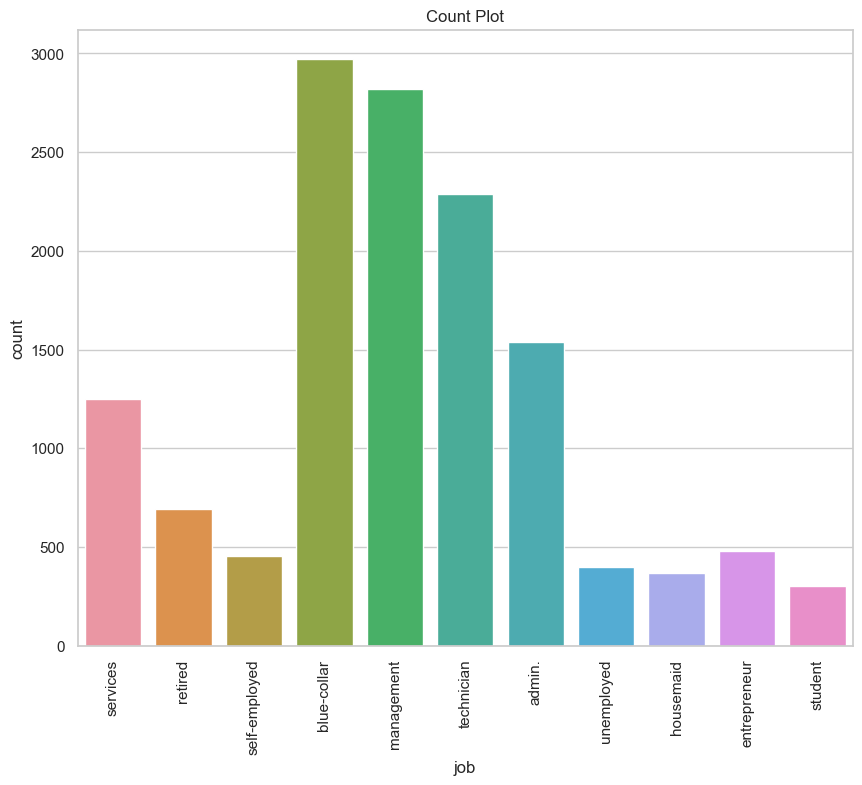

In [106]:
#Visualizing job feature via Count Plot
sb.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sb.countplot(data=ds2,x='job')
plt.title("Count Plot")
plt.xticks(rotation=90)
plt.show()

Blue-collar and management jobs numbers are high than the others.Blue-collar is little bit high than management job.

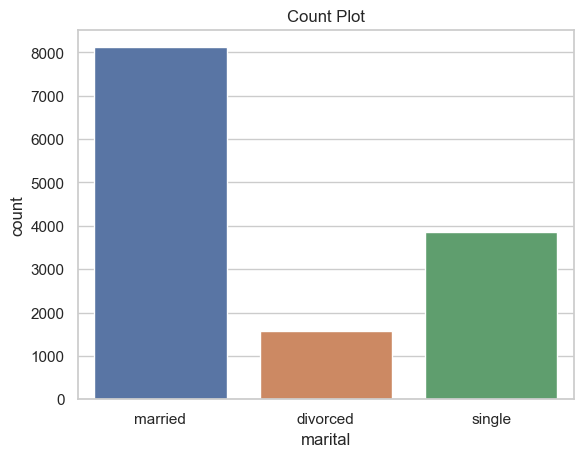

In [107]:
#Visualizing marital feature via Count Plot
sb.countplot(data=ds2,x='marital')
plt.title("Count Plot")
plt.show()

Most of the clients are married.

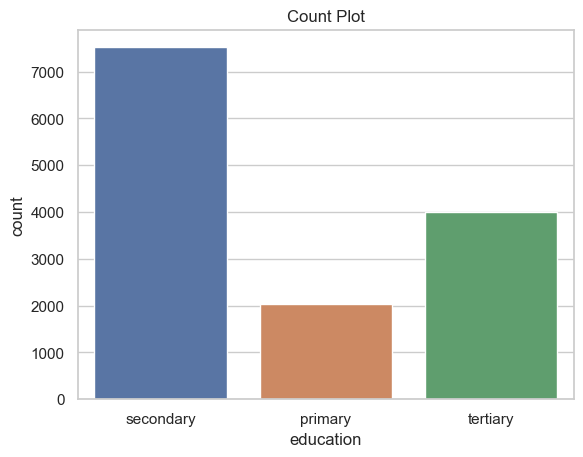

In [108]:
#Visualizing education feature via Count Plot
sb.countplot(data=ds2,x='education')
plt.title("Count Plot")
plt.show()

Most of the clients have secondary education.

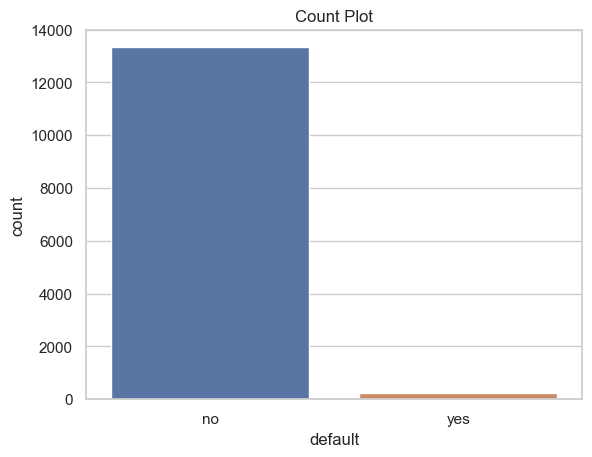

In [109]:
#Visualizing default feature via Count Plot
sb.countplot(data=ds2,x='default')
plt.title("Count Plot")
plt.show()

Almost all of the  clients do not have credit in default.

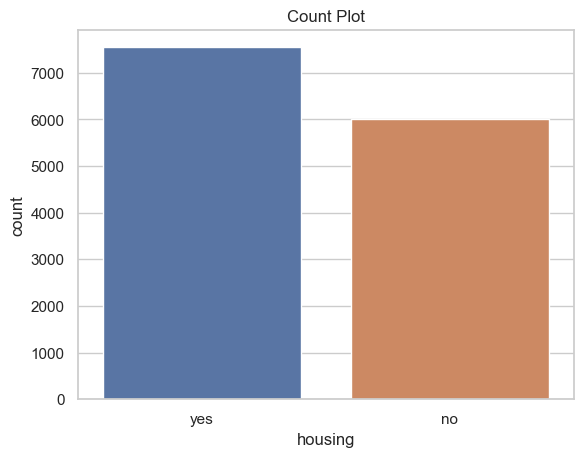

In [110]:
#Visualizing housing feature via Count Plot
sb.countplot(data=ds2,x='housing')
plt.title("Count Plot")
plt.show()

Clients who have housing loans are bit high than the clients who do not have housing loan.

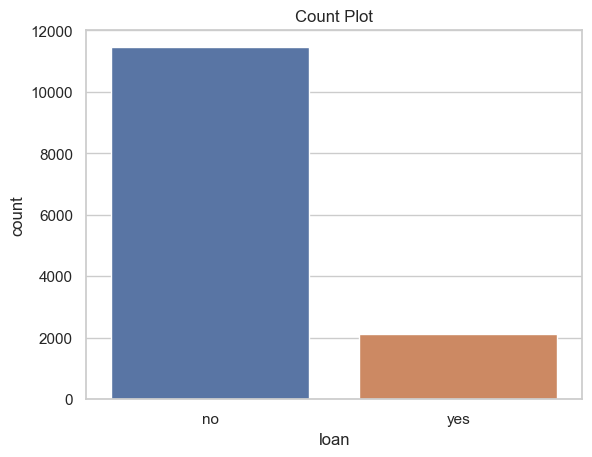

In [111]:
#Visualizing loan feature via Count Plot
sb.countplot(data=ds2,x='loan')
plt.title("Count Plot")
plt.show()

Majority of clients do not have personal loan.

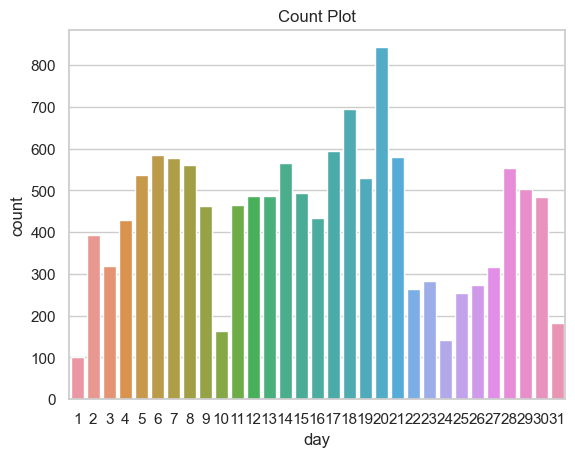

In [112]:
#Visualizing day feature via Count Plot
sb.countplot(data=ds2,x='day')
plt.title("Count Plot")
plt.show()

20th day has the more frequency than the others.

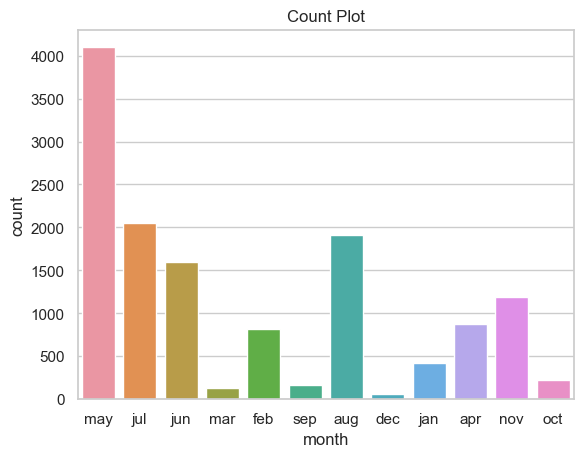

In [113]:
#Visualizing month feature via Count Plot
sb.countplot(data=ds2,x='month')
plt.title("Count Plot")
plt.show()

Most of the clients are contacted in the month of May.

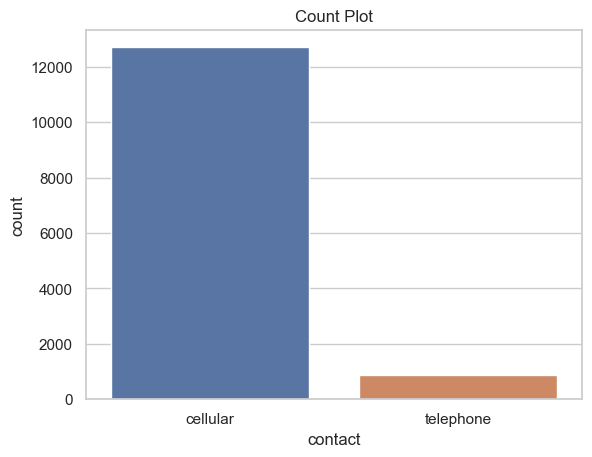

In [114]:
#Visualizing contact feature via Count Plot
sb.countplot(data=ds2,x='contact')
plt.title("Count Plot")
plt.show()

Majority of the clients uses celluar type of communication.

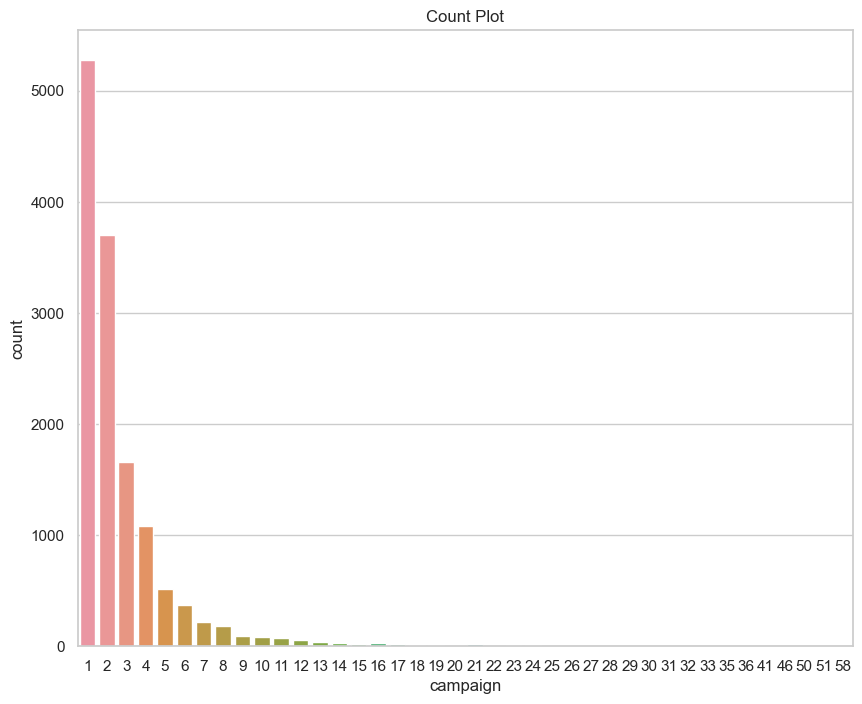

In [115]:
#Visualizing campaign feature via Count Plot
plt.figure(figsize=(10,8))
sb.countplot(data=ds2,x='campaign')
plt.title("Count Plot")
plt.show()

Most of the clients have 1 number of contacts performed during the campaign.

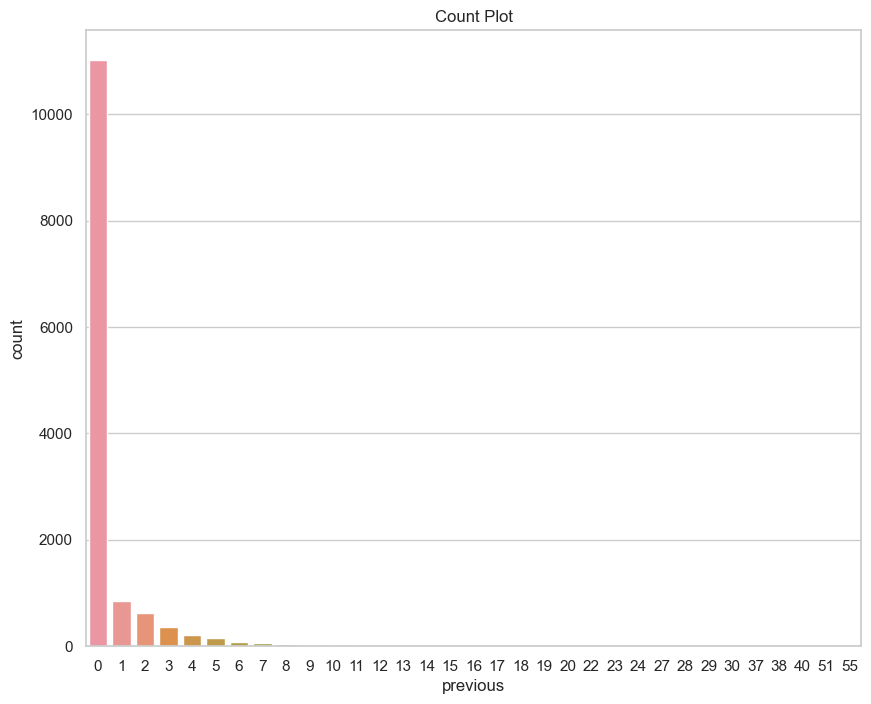

In [116]:
#Visualizing previous feature via Count Plot
plt.figure(figsize=(10,8))
sb.countplot(data=ds2,x='previous')
plt.title("Count Plot")
plt.show()

Most of clients  have zero number of days that passed by after the client was last contacted.

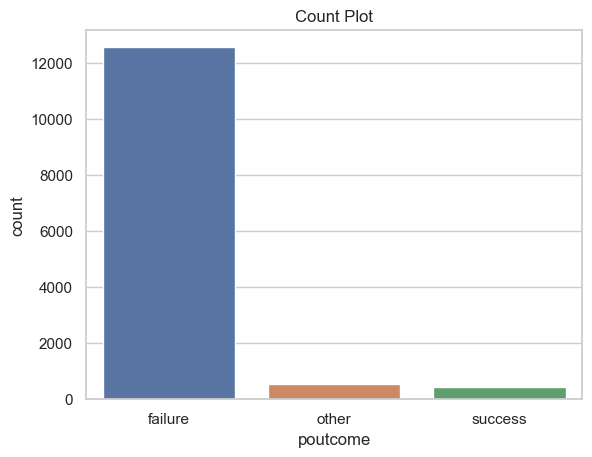

In [117]:
#Visualizing poutcome feature via Count Plot
sb.countplot(data=ds2,x='poutcome')
plt.title("Count Plot")
plt.show()

Most of outcome of previous marketing campaign were a failure.

In [118]:
log=[]#creating empty list
a=['age','balance','duration','campaign','pdays','previous']
def re():#creating function
    for i in a:#iterating col variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=ds2,x=log[-1],y=i,)
            plt.title('Linear Model Plot')
    plt.show()

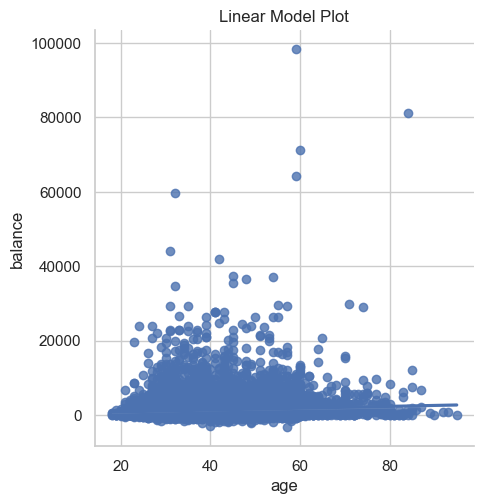

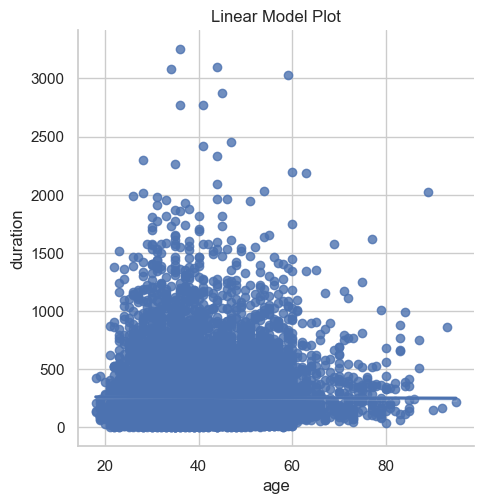

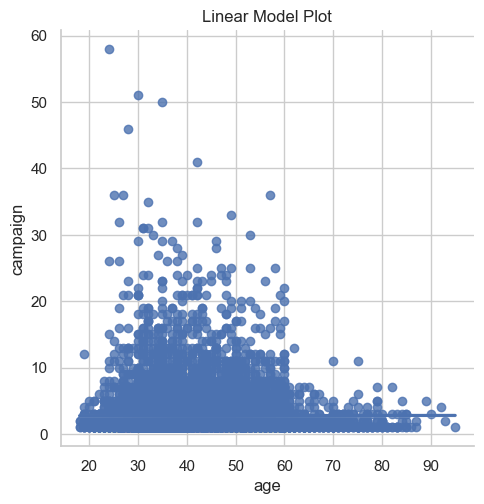

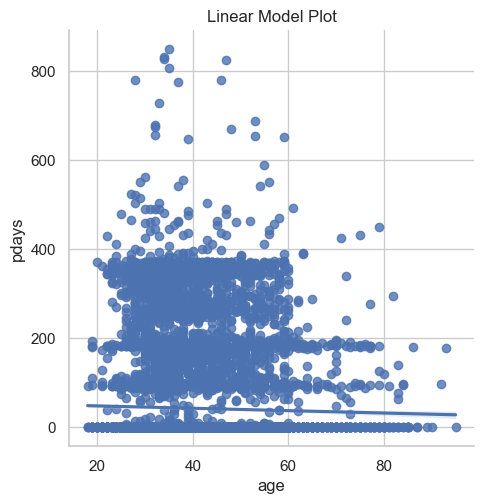

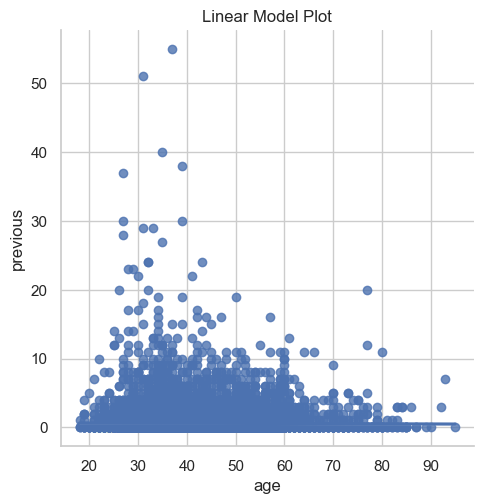

In [119]:
log.append('age')
re()

Age feature doesn't have much linear relation with other features. Most of data is concentrated around 20-60 Age.

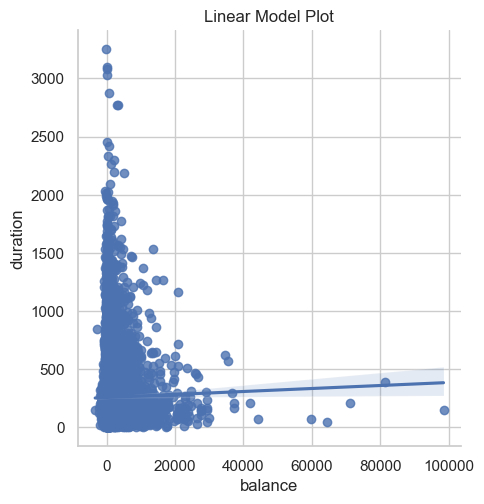

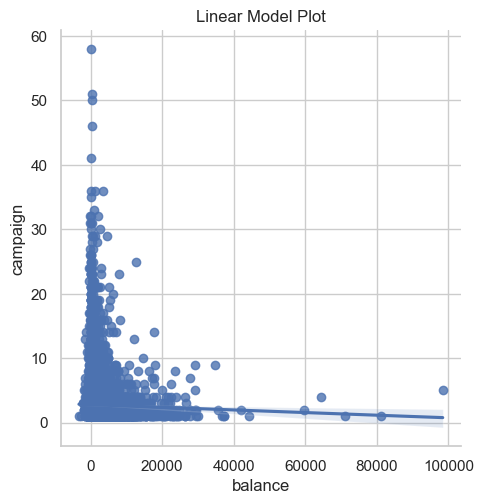

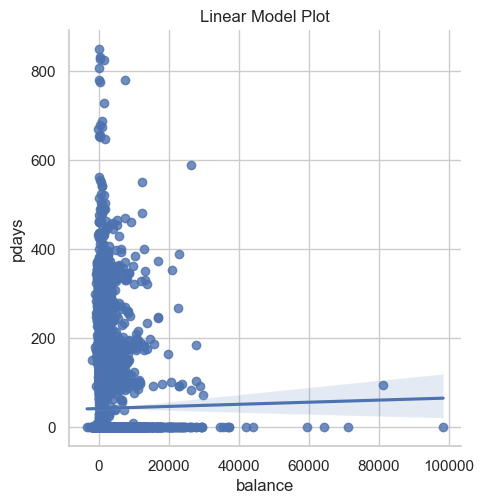

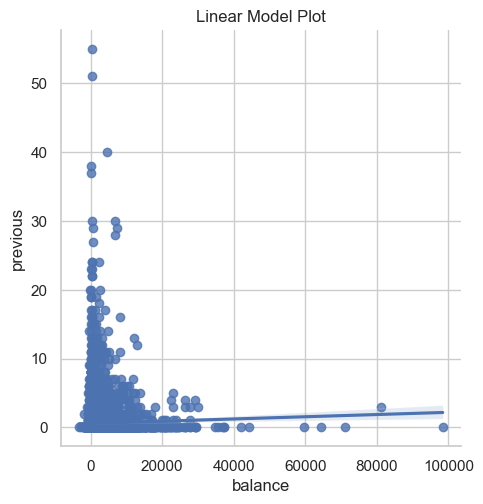

In [120]:
log.append('balance')
re()

Balance feature doesn't have much linear relation with other features. Most of data is concentrated around 0-20000 balance.

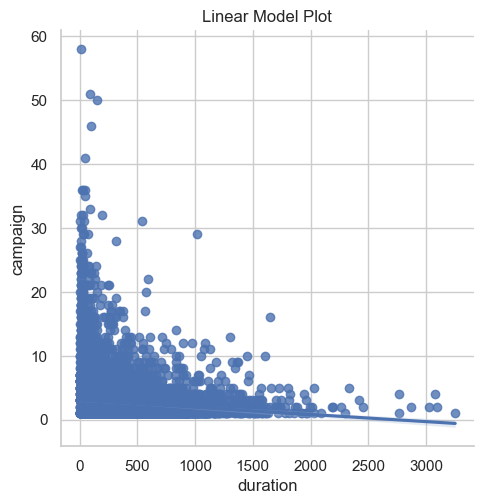

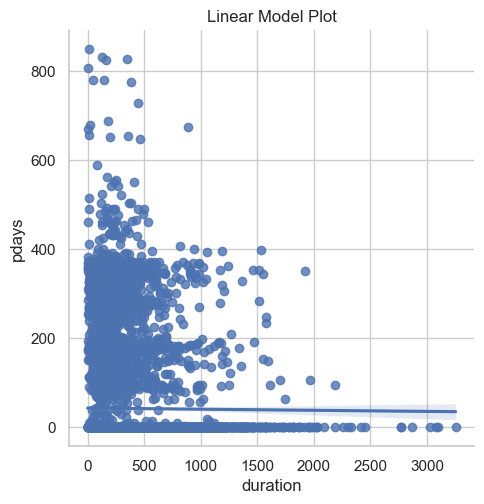

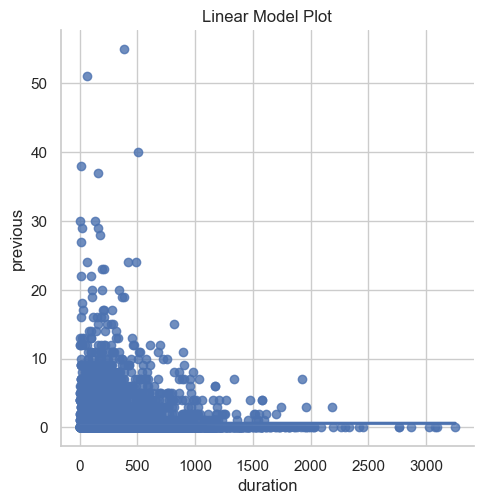

In [121]:
log.append('duration')
re()

Duration feature doesn't have much linear relation with other features. Most of data is concentrated around 0-1500 duration.

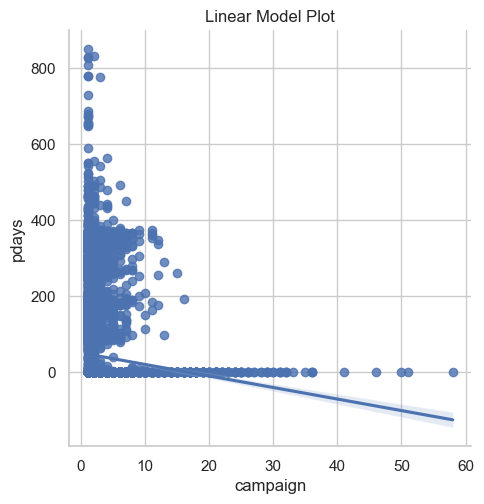

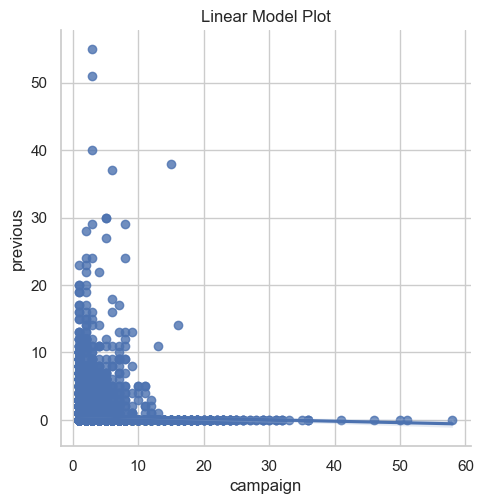

In [122]:
log.append('campaign')
re()

Campaign feature doesn't have much linear relation with other features. Most of data is concentrated around 0-8 campaign.

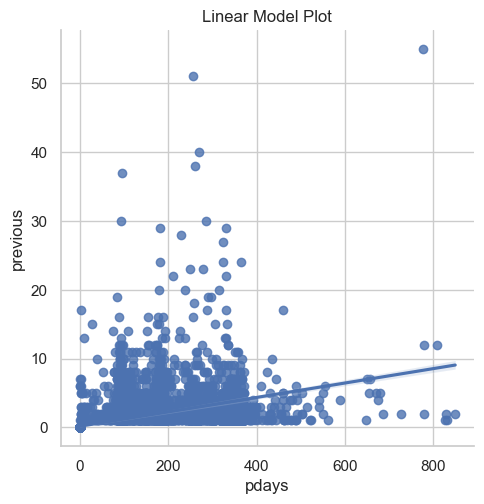

In [123]:
log.append('pdays')
re()

Pdays feature doesn't have much linear relation with previous feature. Most of data is concentrated around 0-400 pdays.

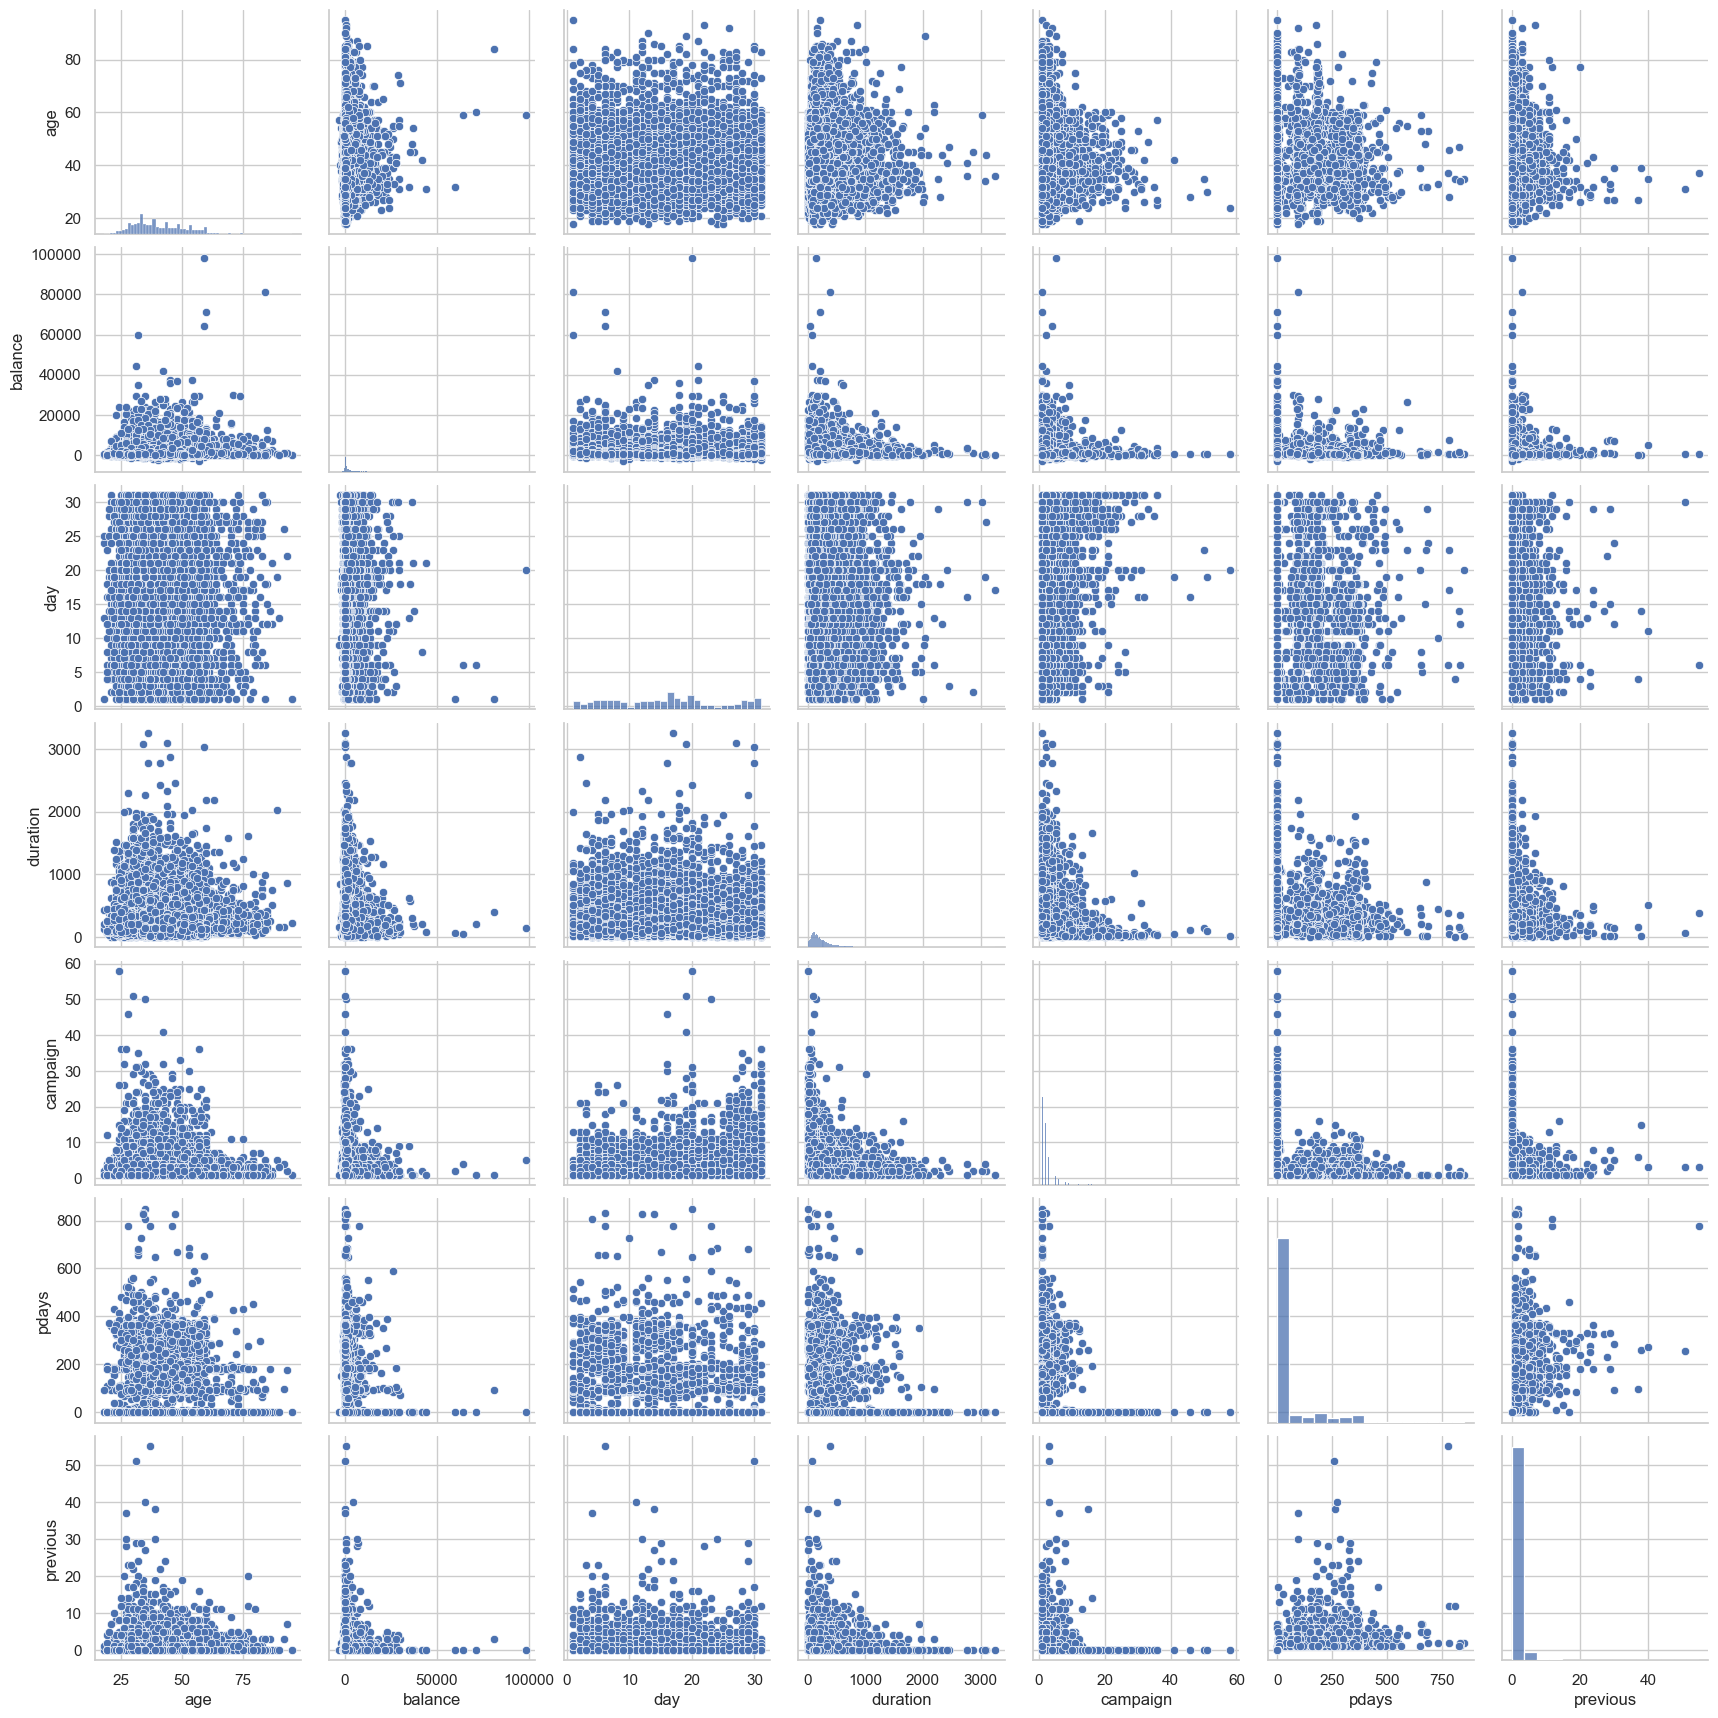

In [124]:
#Visualizing relation between features with multiple plots via Pair plot 
sb.pairplot(data=ds2)
plt.show()

This gives pairwise relation ship between the features along with their distribution in the diagonals.

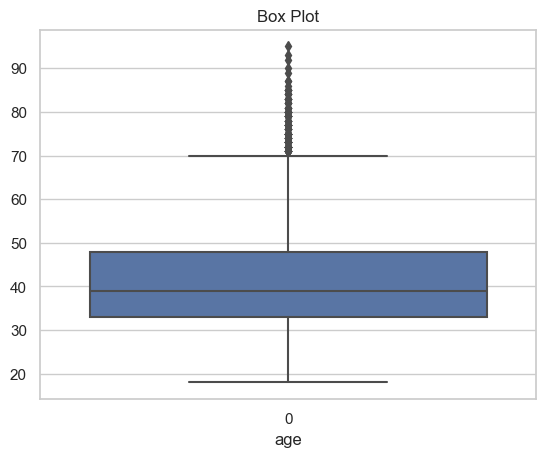

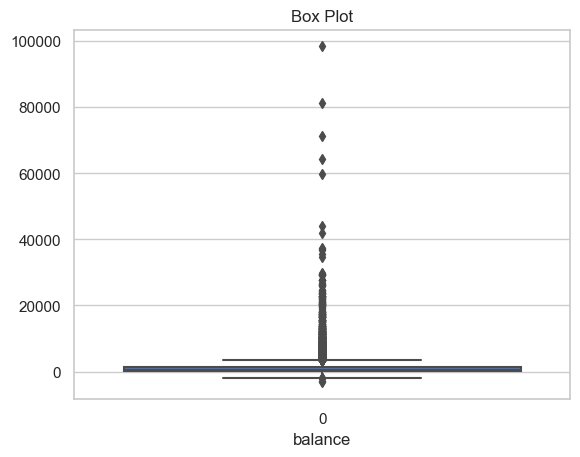

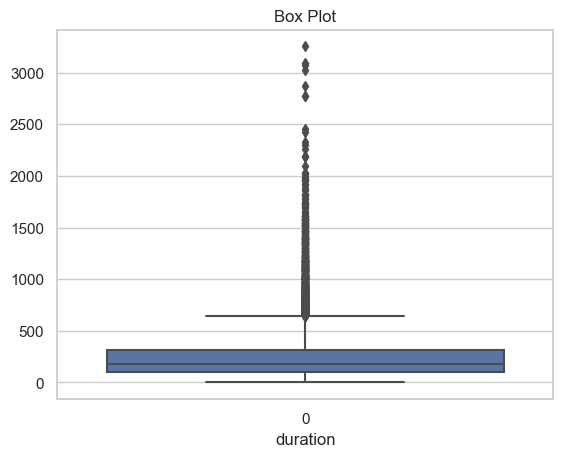

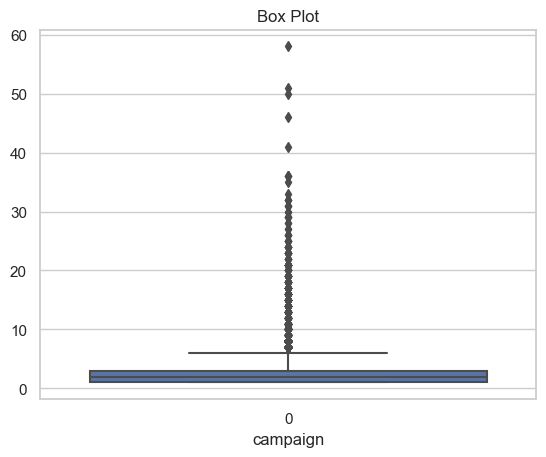

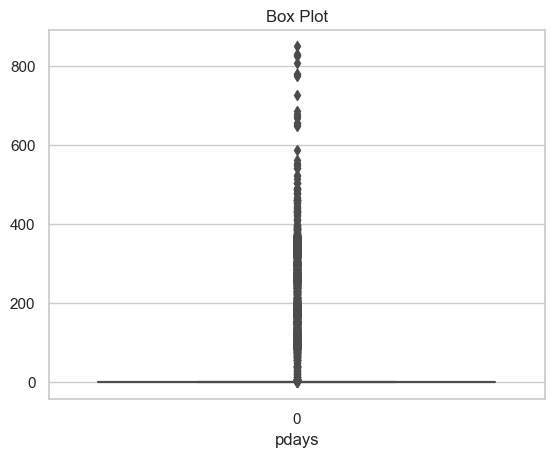

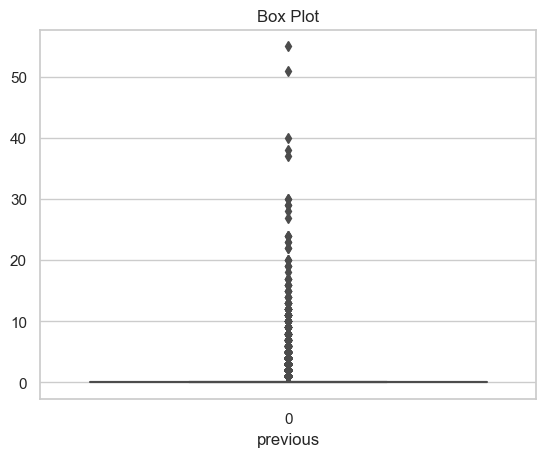

In [125]:
#Checking outliers
for i in a:
    sb.boxplot(ds2[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

Age,duration,pdays,balance,campaign and previous features contains outliers.

In [126]:
#removing outliers using zscore
f_outlier=ds2[a]
z=np.abs(zs(f_outlier))
z

age   balance  duration  campaign     pdays  previous
0      0.838114  0.402389  0.921849  1.058702  0.418199  0.297500
1      3.499987  0.463375  0.439963  0.574850  0.418199  0.297500
2      0.932421  0.393955  1.616074  0.574850  0.418199  0.297500
3      1.519549  0.784508  0.747754  0.248140  0.418199  0.297500
4      0.387871  0.669352  0.569789  0.574850  0.418199  0.297500
...         ...       ...       ...       ...       ...       ...
13559  0.177969  0.426069  0.426644  0.405281  0.418199  0.297500
13560  1.236630  0.299239  0.387957  0.574850  0.418199  0.297500
13561  0.555195  0.348218  0.473070  0.574850  0.418199  0.297500
13562  1.121034  0.290155  0.194517  0.248140  0.483926  1.203911
13563  1.121034  0.440017  0.312293  0.574850  3.141273  0.202970

[13564 rows x 6 columns]

The variables z holds the zscores values of these features.

In [127]:
np.where(z>3)

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64),
 array([0, 4, 1, ..., 2, 3, 4], dtype=int64))

These are the index of  ouliers present in the features.

In [128]:
z.iloc[1,0]

3.4999869283541534

In [129]:
z.iloc[9,4]

3.2393297588430485

In [130]:
z.iloc[14,1]

3.4521896771114244

In [131]:
z.iloc[13563,4]

3.14127268030269

We have confirmed that these values holds outliers as per the threshold value.

In [132]:
#Removing outliers
zscore=ds2[(z<3).all(axis=1)]

In [133]:
#Using IQR method to verify that can it remove outliers with less data loss than zscore method?
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=ds2[~((ds2< (q1-1.5*iqr)) | (ds2>(q3+1.5*iqr))).any(axis=1)]

In [134]:
print('Data loss percentage after removing outliers via zscore',((ds2.shape[0]-zscore.shape[0])/ds2.shape[0])*100)
print('Data loss percentage after removing outliers via IQR',((ds2.shape[0]-IQR.shape[0])/ds2.shape[0])*100)

Data loss percentage after removing outliers via zscore 11.279858448835151
Data loss percentage after removing outliers via IQR 38.24093187850192


We can observe that zscore method performed well here, hence, we will update the dataframe with zscore method.

In [135]:
outliers=ds2.shape[0]-zscore.shape[0]
print(f'Outliers removed : {outliers}')
ds2=zscore#Updating dataframe

Outliers removed : 1530


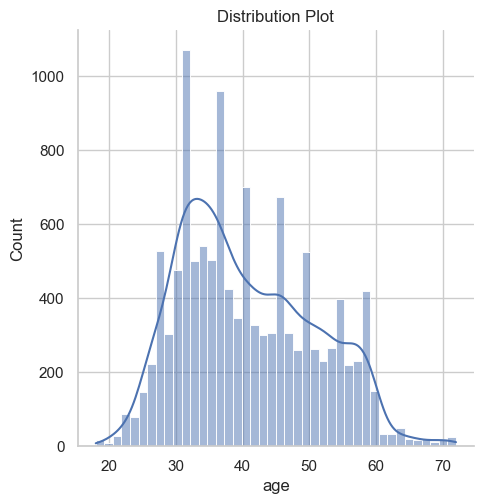

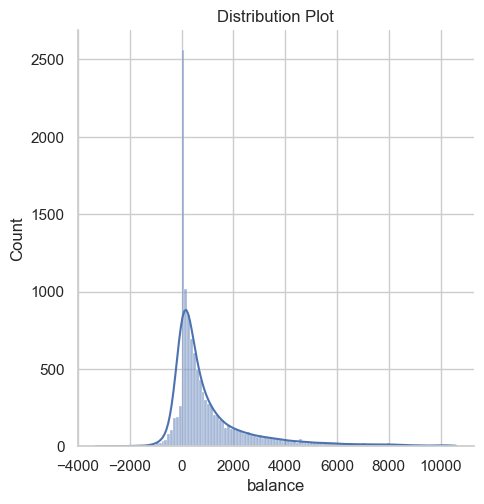

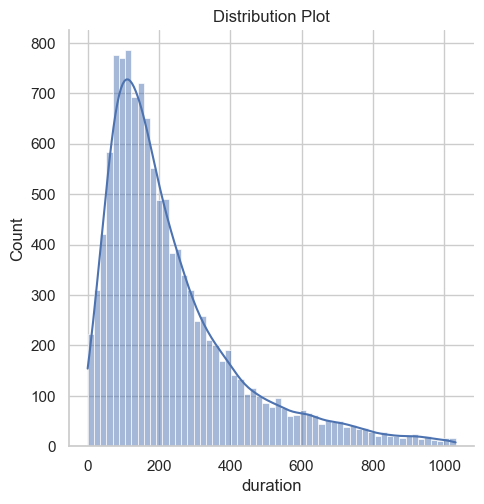

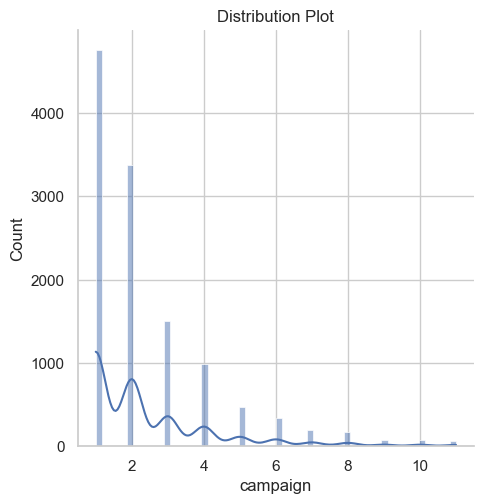

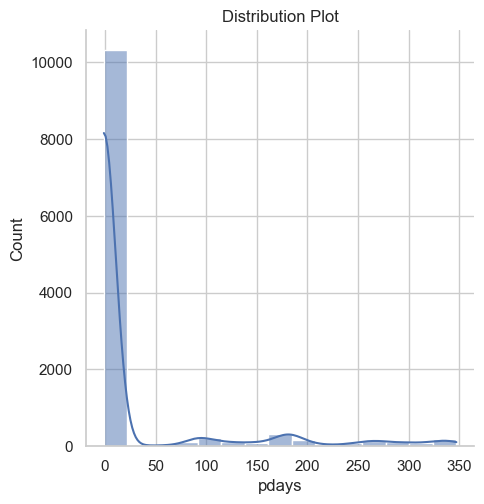

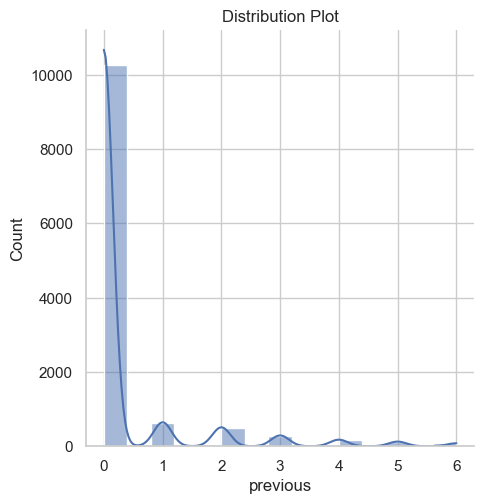

In [136]:
#checking distribution of columns
for i in a:
    sb.displot(ds2[i],kde=True)
    plt.title('Distribution Plot')    

***Balance,duration,pdays,campaign and previous features are skewed to right***. Rest of the features are almost normally distributed.

In [137]:
ds2.skew()#checking skewness

age         0.435270
balance     2.476671
day         0.100926
duration    1.578135
campaign    1.958366
pdays       2.728161
previous    3.398894
dtype: float64

Balance,duration,campaign, and pdays features do not fall under the accpetable range , thus , we can use yeojohnson method to remove skewness.

In [138]:
from scipy.stats import yeojohnson as yj
for i in a:
    ds2[i],p=yj(ds2[i])
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.003737
previous    2.002765
dtype: float64

There is still skewness in balance,previous and pdays features.We can try log on  method 'pdays' column.

In [139]:
ds2['t_pdays']=np.log(ds2['pdays'])#creating a temprorary column to compare
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.003737
previous    2.002765
t_pdays    -9.739583
dtype: float64

In [140]:
#Log method is not working well on 'pdays' column ,thus, we can discard it.
ds2.drop('t_pdays',axis=1,inplace=True)
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.003737
previous    2.002765
dtype: float64

Temporary column is removed succesfully. Using log + 1 method on 'balance' and previous features.

In [141]:
ds2['2balance']=np.log1p(ds2['balance'])#creating a temprorary column to compare
ds2['previous']=np.log1p(ds2['previous'])
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.003737
previous    2.002720
2balance   -1.190677
dtype: float64

In [142]:
#Log + 1 method is not working well on 'balance' column ,thus, we can discard it.
ds2.drop('2balance',axis=1,inplace=True)
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.003737
previous    2.002720
dtype: float64

Temporary column is removed succesfully. Using square root method .

In [143]:
ds2['2balance']=np.sqrt(ds2['balance'])#creating a temprorary column to compare
ds2['2pdays']=np.sqrt(ds2['pdays'])#creating a temprorary column to compare
ds2['previous']=np.sqrt(ds2['previous'])
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.003737
previous    2.002518
2balance    0.764241
2pdays     -9.087049
dtype: float64

In [144]:
#square root method is not working well on 'balance' and 'pdays' column ,thus, we can discard it.
ds2.drop('2balance',axis=1,inplace=True)
ds2.drop('2pdays',axis=1,inplace=True)
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.003737
previous    2.002518
dtype: float64

Temporary column are removed succesfully. Using cuberoot method .

In [145]:
ds2['2balance']=np.cbrt(ds2['balance'])#creating a temprorary column to compare
ds2['pdays']=np.cbrt(ds2['pdays'])
ds2['previous']=np.cbrt(ds2['previous'])
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.002766
previous    2.002457
2balance   -1.191955
dtype: float64

In [146]:
#cube root method is not working well on 'balance' column ,thus, we can discard it.
ds2.drop('2balance',axis=1,inplace=True)
ds2.skew()

age        -0.000693
balance     0.599653
day         0.100926
duration    0.002050
campaign    0.204037
pdays       2.002766
previous    2.002457
dtype: float64

There is still skewness in pdays,balance and  previous features. As some of the data are not positive,hence, we can not apply other methods. Therefore,we can accept these skewness values as thresholds values.

In [147]:
#Checking encoded values assigned to test dataset
encoded_ds

job  Encoded_job   marital  Encoded_marital  education  \
0           admin.            0   married                1  secondary   
1      blue-collar            1   married                1  secondary   
2         services            7   married                1  secondary   
3       management            4  divorced                0   tertiary   
4       technician            9   married                1  secondary   
...            ...          ...       ...              ...        ...   
31640   management            4    single                2  secondary   
31641   technician            9    single                2   tertiary   
31642   management            4    single                2   tertiary   
31643   management            4  divorced                0   tertiary   
31644   management            4    single                2   tertiary   

       Encoded_education default  Encoded_default housing  Encoded_housing  \
0                      1      no                0      no                0   
1                      1      no                0      no                0   
2                      1      no                0     yes                1   
3                      2      no                0      no                0   
4                      1      no                0     yes                1   
...                  ...     ...              ...     ...              ...   
31640                  1      no                0      no                0   
31641                  2      no                0      no                0   
31642                  2      no                0     yes                1   
31643                  2      no                0      no                0   
31644                  2      no                0      no                0   

      loan  Encoded_loan    contact  Encoded_contact month  Encoded_month  \
0       no             0  telephone                1   nov              9   
1       no             0   cellular                0   jul              5   
2       no             0   cellular                0   jul              5   
3       no             0   cellular                0   jun              6   
4       no             0   cellular                0   feb              3   
...    ...           ...        ...              ...   ...            ...   
31640   no             0   cellular                0   jun              6   
31641   no             0   cellular                0   jun              6   
31642   no             0   cellular                0   may              8   
31643  yes             1   cellular                0   jun              6   
31644   no             0   cellular                0   aug              1   

      poutcome  Encoded_poutcome subscribed  Encoded_subscribed  
0      failure                 0         no                   0  
1      failure                 0         no                   0  
2      failure                 0         no                   0  
3      success                 2        yes                   1  
4      failure                 0         no                   0  
...        ...               ...        ...                 ...  
31640  failure                 0         no                   0  
31641  failure                 0         no                   0  
31642  failure                 0         no                   0  
31643  failure                 0        yes                   1  
31644  failure                 0         no                   0  

[28124 rows x 20 columns]

These are the values assigned to catagotical data.

In [149]:
#encoding catagotical data present in ds2 data frame  based on the 'encoded_ds' variable
col=ds2.columns.to_list()
a=[]
for i in col:
    if ds2[i].dtypes==object:
        a.append(i)

for i in a:
    unqiue=encoded_ds.drop_duplicates(subset=i)
    temp=unqiue[[i,'Encoded_'+i]]
    temp.reset_index(drop=True,inplace=True)#Resting index
    value_count=temp.count()[0]
    for g in range(0,value_count):
        encoded_value=temp.loc[g,'Encoded_'+i]
        old_value=temp.loc[g,i]
        ds2[i].replace(old_value,encoded_value,inplace=True)
ds2

age  job  marital  education  default      balance  housing  loan  \
0      3.569732    7        1          1        0    72.254562        1     0   
2      3.537669    6        2          2        0    86.018749        1     0   
3      4.159414    7        2          0        0  1483.939106        1     0   
4      3.916554    1        0          1        0 -1467.461516        0     1   
5      3.569732    4        2          2        0     0.000000        1     0   
...         ...  ...      ...        ...      ...          ...      ...   ...   
13558  3.569732    9        2          1        0    78.121309        1     0   
13559  3.770446    4        1          2        0    30.966239        0     0   
13560  4.103712    1        1          0        0   956.786126        1     0   
13561  3.660460    5        1          0        0   156.218587        1     0   
13562  3.470458    0        2          1        0   239.008861        0     0   

       contact  day  month   duration  campaign     pdays  previous  poutcome  
0            0   15      8   4.250138  0.831642 -1.282673 -0.000000         0  
2            0   16      8  13.853759  0.493149 -1.282673 -0.000000         0  
3            1   13      8   6.687551  0.653317 -1.282673 -0.000000         0  
4            0    3      5   8.024978  0.493149 -1.282673 -0.000000         0  
5            0   22      5  12.380236  0.653317 -1.282673 -0.000000         0  
...        ...  ...    ...        ...       ...       ...       ...       ...  
13558        0    7      8   9.876189  0.493149 -1.282673 -0.000000         0  
13559        0   28      1   8.810442  0.778878 -1.282673 -0.000000         0  
13560        0   20      6   8.995800  0.493149 -1.282673 -0.000000         0  
13561        0   29      4   8.574529  0.493149 -1.282673 -0.000000         0  
13562        0    9      9   9.804114  0.653317  1.075883  0.735023         2  

[12034 rows x 16 columns]

All the catagorical values are encoded accordingly.

In [160]:
#Checking correlation between independant and dependant varibales
cor=ds2.corr()
cor

age       job   marital  education   default   balance  \
age        1.000000 -0.047669 -0.422061  -0.161278 -0.021253  0.087716   
job       -0.047669  1.000000  0.047284   0.171104 -0.012025  0.005301   
marital   -0.422061  0.047284  1.000000   0.118861  0.001582  0.014015   
education -0.161278  0.171104  0.118861   1.000000 -0.020855  0.049741   
default   -0.021253 -0.012025  0.001582  -0.020855  1.000000 -0.160446   
balance    0.087716  0.005301  0.014015   0.049741 -0.160446  1.000000   
housing   -0.149473 -0.108027 -0.014701  -0.065616  0.007690 -0.082931   
loan      -0.001343 -0.014000 -0.060814  -0.032276  0.063530 -0.135783   
contact    0.112638 -0.012220 -0.021582  -0.061511 -0.016289  0.035466   
day       -0.011482  0.022459  0.004194   0.041331  0.005107  0.003666   
month     -0.049901 -0.094444 -0.016489  -0.080578  0.033134  0.015619   
duration  -0.024276  0.009841  0.003055  -0.008206 -0.005333  0.024657   
campaign   0.045760  0.015617 -0.024085   0.013918  0.015125 -0.019525   
pdays      0.000045  0.011374  0.015383   0.052380 -0.037700  0.076343   
previous   0.000077  0.011391  0.015397   0.052507 -0.037712  0.076238   
poutcome   0.004588  0.029816  0.021685   0.046939 -0.026046  0.054215   

            housing      loan   contact       day     month  duration  \
age       -0.149473 -0.001343  0.112638 -0.011482 -0.049901 -0.024276   
job       -0.108027 -0.014000 -0.012220  0.022459 -0.094444  0.009841   
marital   -0.014701 -0.060814 -0.021582  0.004194 -0.016489  0.003055   
education -0.065616 -0.032276 -0.061511  0.041331 -0.080578 -0.008206   
default    0.007690  0.063530 -0.016289  0.005107  0.033134 -0.005333   
balance   -0.082931 -0.135783  0.035466  0.003666  0.015619  0.024657   
housing    1.000000  0.050499 -0.055020 -0.021067  0.276915  0.006771   
loan       0.050499  1.000000  0.003036  0.001628  0.021297 -0.012298   
contact   -0.055020  0.003036  1.000000  0.033117 -0.003397 -0.070485   
day       -0.021067  0.001628  0.033117  1.000000  0.000566 -0.027698   
month      0.276915  0.021297 -0.003397  0.000566  1.000000 -0.007731   
duration   0.006771 -0.012298 -0.070485 -0.027698 -0.007731  1.000000   
campaign  -0.040086 -0.010795  0.058931  0.122376 -0.145025 -0.093544   
pdays      0.054475 -0.030440  0.007495 -0.077611 -0.010855  0.030933   
previous   0.054164 -0.030413  0.007440 -0.077584 -0.011070  0.030884   
poutcome  -0.059273 -0.045536  0.006666 -0.046796 -0.006185  0.069844   

           campaign     pdays  previous  poutcome  
age        0.045760  0.000045  0.000077  0.004588  
job        0.015617  0.011374  0.011391  0.029816  
marital   -0.024085  0.015383  0.015397  0.021685  
education  0.013918  0.052380  0.052507  0.046939  
default    0.015125 -0.037700 -0.037712 -0.026046  
balance   -0.019525  0.076343  0.076238  0.054215  
housing   -0.040086  0.054475  0.054164 -0.059273  
loan      -0.010795 -0.030440 -0.030413 -0.045536  
contact    0.058931  0.007495  0.007440  0.006666  
day        0.122376 -0.077611 -0.077584 -0.046796  
month     -0.145025 -0.010855 -0.011070 -0.006185  
duration  -0.093544  0.030933  0.030884  0.069844  
campaign   1.000000 -0.124037 -0.124002 -0.069189  
pdays     -0.124037  1.000000  0.999960  0.561222  
previous  -0.124002  0.999960  1.000000  0.562129  
poutcome  -0.069189  0.561222  0.562129  1.000000

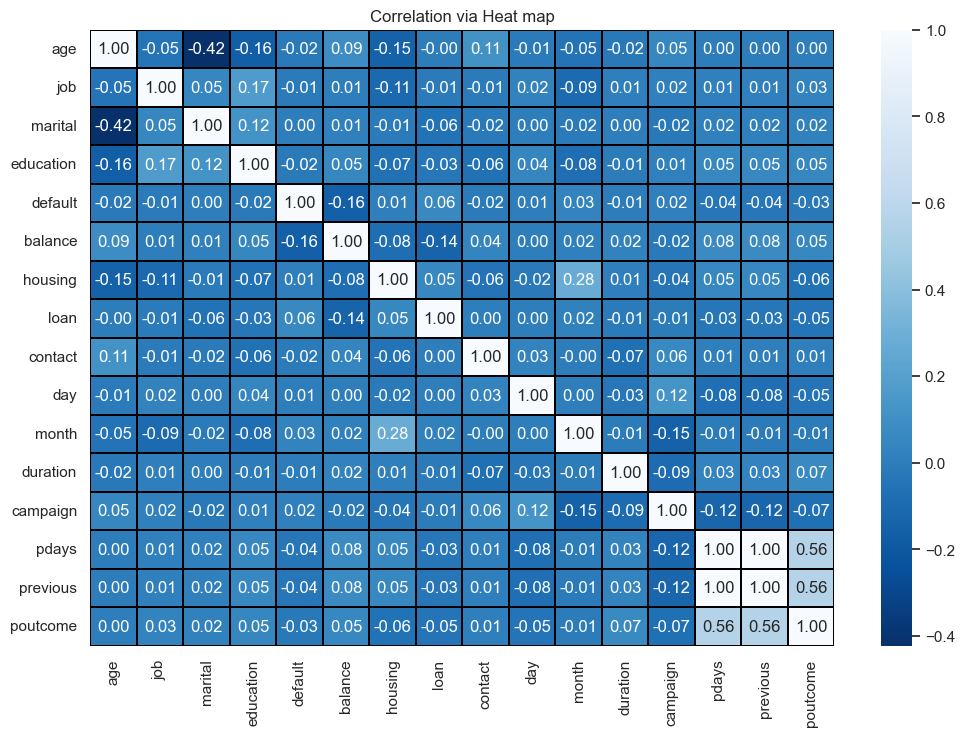

In [161]:
#Visualizing correlation
plt.figure(figsize=(12,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.2f')
plt.title('Correlation via Heat map')
plt.show()

We can observe that ***Pdays and previous features*** have ***high positive correlation*** with each other.

In [162]:
#applying StandardScaler
ds2=pd.DataFrame(sc.fit_transform(ds2),columns=ds2.columns)
ds2

age       job   marital  education   default   balance   housing  \
0     -0.841695  0.829468 -0.273350  -0.220405 -0.134234 -0.461657  0.897827   
1     -0.968274  0.522156  1.368116   1.318974 -0.134234 -0.442772  0.897827   
2      1.486206  0.829468  1.368116  -1.759784 -0.134234  1.475323  0.897827   
3      0.527461 -1.014407 -1.914817  -0.220405 -0.134234 -2.574310 -1.113800   
4     -0.841695 -0.092470  1.368116   1.318974 -0.134234 -0.560798  0.897827   
...         ...       ...       ...        ...       ...       ...       ...   
12029 -0.841695  1.444093  1.368116  -0.220405 -0.134234 -0.453608  0.897827   
12030 -0.049335 -0.092470 -0.273350   1.318974 -0.134234 -0.518309 -1.113800   
12031  1.266309 -1.014407 -0.273350  -1.759784 -0.134234  0.752013  0.897827   
12032 -0.483527  0.214843 -0.273350  -1.759784 -0.134234 -0.346450  0.897827   
12033 -1.233602 -1.321720  1.368116  -0.220405 -0.134234 -0.232853 -1.113800   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.436241 -0.243771 -0.085446  0.846484 -2.122535  1.591051 -0.413875   
1     -0.436241 -0.243771  0.035213  0.846484  1.805449 -1.102406 -0.413875   
2     -0.436241  4.102213 -0.326763  0.846484 -1.125607  0.172086 -0.413875   
3      2.292308 -0.243771 -1.533350 -0.156594 -0.578585 -1.102406 -0.413875   
4     -0.436241 -0.243771  0.759165 -0.156594  1.202762  0.172086 -0.413875   
...         ...       ...       ...       ...       ...       ...       ...   
12029 -0.436241 -0.243771 -1.050715  0.846484  0.178580 -1.102406 -0.413875   
12030 -0.436241 -0.243771  1.483117 -1.494030 -0.257322  1.171199 -0.413875   
12031 -0.436241 -0.243771  0.517848  0.177765 -0.181508 -1.102406 -0.413875   
12032 -0.436241 -0.243771  1.603776 -0.490953 -0.353813 -1.102406 -0.413875   
12033 -0.436241 -0.243771 -0.809398  1.180843  0.149101  0.172086  2.414243   

       previous  poutcome  
0     -0.413891 -0.232654  
1     -0.413891 -0.232654  
2     -0.413891 -0.232654  
3     -0.413891 -0.232654  
4     -0.413891 -0.232654  
...         ...       ...  
12029 -0.413891 -0.232654  
12030 -0.413891 -0.232654  
12031 -0.413891 -0.232654  
12032 -0.413891 -0.232654  
12033  2.418869  5.251683  

[12034 rows x 16 columns]

The data is scaled using StandarScaler method to overcome the issue of biasness.

In [163]:
#Checking varience inflation factor
v=pd.DataFrame()#creating empty data frame
v['VIF']=[vif(ds2.values,i) for i in range(len(ds2.columns))]
v['Features']=ds2.columns
v

VIF   Features
0       1.306842        age
1       1.046278        job
2       1.237801    marital
3       1.079527  education
4       1.031185    default
5       1.070262    balance
6       1.154290    housing
7       1.028025       loan
8       1.027342    contact
9       1.023526        day
10      1.122471      month
11      1.020130   duration
12      1.066170   campaign
13  12648.174418      pdays
14  12666.417765   previous
15      1.510292   poutcome

Here we can observe that pdays and previous features pose multicollineraity problem, hence, we can drop previous feature.

In [164]:
ds2.drop('previous',axis=1,inplace=True)#droping previous feature
ds2

age       job   marital  education   default   balance   housing  \
0     -0.841695  0.829468 -0.273350  -0.220405 -0.134234 -0.461657  0.897827   
1     -0.968274  0.522156  1.368116   1.318974 -0.134234 -0.442772  0.897827   
2      1.486206  0.829468  1.368116  -1.759784 -0.134234  1.475323  0.897827   
3      0.527461 -1.014407 -1.914817  -0.220405 -0.134234 -2.574310 -1.113800   
4     -0.841695 -0.092470  1.368116   1.318974 -0.134234 -0.560798  0.897827   
...         ...       ...       ...        ...       ...       ...       ...   
12029 -0.841695  1.444093  1.368116  -0.220405 -0.134234 -0.453608  0.897827   
12030 -0.049335 -0.092470 -0.273350   1.318974 -0.134234 -0.518309 -1.113800   
12031  1.266309 -1.014407 -0.273350  -1.759784 -0.134234  0.752013  0.897827   
12032 -0.483527  0.214843 -0.273350  -1.759784 -0.134234 -0.346450  0.897827   
12033 -1.233602 -1.321720  1.368116  -0.220405 -0.134234 -0.232853 -1.113800   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.436241 -0.243771 -0.085446  0.846484 -2.122535  1.591051 -0.413875   
1     -0.436241 -0.243771  0.035213  0.846484  1.805449 -1.102406 -0.413875   
2     -0.436241  4.102213 -0.326763  0.846484 -1.125607  0.172086 -0.413875   
3      2.292308 -0.243771 -1.533350 -0.156594 -0.578585 -1.102406 -0.413875   
4     -0.436241 -0.243771  0.759165 -0.156594  1.202762  0.172086 -0.413875   
...         ...       ...       ...       ...       ...       ...       ...   
12029 -0.436241 -0.243771 -1.050715  0.846484  0.178580 -1.102406 -0.413875   
12030 -0.436241 -0.243771  1.483117 -1.494030 -0.257322  1.171199 -0.413875   
12031 -0.436241 -0.243771  0.517848  0.177765 -0.181508 -1.102406 -0.413875   
12032 -0.436241 -0.243771  1.603776 -0.490953 -0.353813 -1.102406 -0.413875   
12033 -0.436241 -0.243771 -0.809398  1.180843  0.149101  0.172086  2.414243   

       poutcome  
0     -0.232654  
1     -0.232654  
2     -0.232654  
3     -0.232654  
4     -0.232654  
...         ...  
12029 -0.232654  
12030 -0.232654  
12031 -0.232654  
12032 -0.232654  
12033  5.251683  

[12034 rows x 15 columns]

Previous feature is dropped successfully.

In [165]:
v=pd.DataFrame()#creating empty data frame
v['VIF']=[vif(ds2.values,i) for i in range(len(ds2.columns))]
v['Features']=ds2.columns
v

VIF   Features
0   1.306836        age
1   1.046230        job
2   1.237801    marital
3   1.079408  education
4   1.031178    default
5   1.070065    balance
6   1.153989    housing
7   1.027976       loan
8   1.027282    contact
9   1.023518        day
10  1.122101      month
11  1.019950   duration
12  1.066168   campaign
13  1.509393      pdays
14  1.487230   poutcome

Now the multicollineraity problem is solved.  
Dropping contact feature as it was not present during training of the data.

In [167]:
ds2.drop('contact',axis=1,inplace=True)#Dropping column

Now the data frame is ready for testing.

In [172]:
#Conclusion
Predicted_values=final.predict(ds2)#predicting
conclusion=ds2#storing data of 'ds2' in 'conclusion' variable
conclusion['Predicted Subscribed']=Predicted_values#adding new column

In [173]:
#Replacing encoded values with original values
conclusion['Predicted Subscribed'].replace(0,'No',inplace=True)#replacing values
conclusion['Predicted Subscribed'].replace(1,'Yes',inplace=True)#replacing values
conclusion.sample(40)

age       job   marital  education   default   balance   housing  \
3299  -0.841695 -0.399782 -0.273350  -0.220405 -0.134234  1.330055 -1.113800   
10084 -0.599528 -0.092470  1.368116   1.318974 -0.134234  1.408548  0.897827   
8761  -0.599528 -1.014407  1.368116  -1.759784  7.449675 -0.563787 -1.113800   
9959   0.436691 -0.707095 -1.914817  -0.220405 -0.134234 -0.893629  0.897827   
2972  -0.260783  1.751406  1.368116   1.318974 -0.134234  0.252520  0.897827   
10513  0.151913 -0.092470 -0.273350   1.318974 -0.134234  3.732042  0.897827   
11957  1.486206 -1.014407 -0.273350  -1.759784 -0.134234 -0.001569 -1.113800   
11306 -0.153719  0.522156 -0.273350  -0.220405 -0.134234 -0.350395  0.897827   
1684   0.616301 -1.321720  1.368116  -0.220405 -0.134234 -0.152865  0.897827   
8320   0.343906  1.444093  1.368116   1.318974  7.449675 -0.560798 -1.113800   
3665  -0.483527 -1.321720 -0.273350   1.318974 -0.134234  0.050437  0.897827   
6090   0.249013 -1.014407 -0.273350  -0.220405 -0.134234 -0.423622  0.897827   
11671 -1.372895 -0.092470  1.368116   1.318974 -0.134234 -0.412463  0.897827   
8822  -0.049335 -0.399782 -0.273350  -0.220405 -0.134234 -0.560798 -1.113800   
2918   0.436691  0.829468  1.368116  -0.220405 -0.134234 -0.191323  0.897827   
2768   1.034224 -1.014407 -0.273350  -1.759784 -0.134234 -0.427842  0.897827   
8296   0.436691 -1.014407  1.368116  -1.759784 -0.134234 -0.444208  0.897827   
11420 -0.841695  0.829468  1.368116  -0.220405 -0.134234 -0.486441  0.897827   
3636  -1.233602 -0.092470 -0.273350  -0.220405 -0.134234 -0.382377 -1.113800   
9656   0.249013 -0.092470 -0.273350  -0.220405 -0.134234 -0.560798 -1.113800   
6144  -0.260783 -0.092470  1.368116   1.318974 -0.134234 -0.383052  0.897827   
6547  -0.260783  0.829468 -0.273350  -1.759784  7.449675 -1.874481  0.897827   
5401   0.052502 -1.014407 -0.273350  -0.220405 -0.134234  1.257275 -1.113800   
3453  -0.968274  1.444093 -0.273350  -0.220405 -0.134234 -0.555980  0.897827   
5049   1.414181  0.829468 -0.273350  -0.220405 -0.134234 -0.088564  0.897827   
1985  -1.233602  1.444093  1.368116   1.318974 -0.134234 -0.107298  0.897827   
978   -1.821191  1.136781  1.368116  -0.220405 -0.134234 -0.305633 -1.113800   
9936   0.151913 -1.014407 -0.273350  -1.759784 -0.134234  1.173009  0.897827   
7158   1.034224 -1.014407 -1.914817  -0.220405 -0.134234 -0.560798 -1.113800   
3428  -0.483527 -1.014407 -0.273350  -0.220405 -0.134234 -0.197385  0.897827   
4952  -1.666321 -0.399782 -0.273350   1.318974 -0.134234 -0.184672 -1.113800   
6097  -1.098823 -1.014407  1.368116  -0.220405 -0.134234 -0.409693 -1.113800   
6511  -0.483527 -1.321720  1.368116  -0.220405 -0.134234  0.837265  0.897827   
3091   0.527461  0.829468 -0.273350  -0.220405 -0.134234 -0.565401  0.897827   
6588  -0.370668  0.829468  1.368116  -0.220405 -0.134234 -0.481094  0.897827   
55     0.703293 -0.399782 -1.914817  -0.220405 -0.134234  0.325762 -1.113800   
1294   0.703293 -1.014407 -0.273350  -1.759784 -0.134234 -0.560798  0.897827   
7053  -0.841695 -1.014407  1.368116  -1.759784 -0.134234  0.013199 -1.113800   
10240 -0.841695 -1.014407  1.368116  -0.220405 -0.134234 -0.551712  0.897827   
469    0.527461 -1.321720 -0.273350  -0.220405 -0.134234 -0.313971 -1.113800   

           loan       day     month  duration  campaign     pdays  poutcome  \
3299  -0.436241 -1.050715 -1.494030  0.647046  0.172086 -0.413875 -0.232654   
10084 -0.436241  1.362459  0.846484 -1.081910  1.901073 -0.413875 -0.232654   
8761   2.292308 -1.050715 -0.156594  0.094600 -1.102406 -0.413875 -0.232654   
9959  -0.436241 -1.654009  0.177765 -1.110870  1.591051 -0.413875 -0.232654   
2972  -0.436241 -0.688739  0.512125  0.830072  0.172086  2.416174 -0.232654   
10513 -0.436241  0.517848 -1.828390 -2.281907  0.799254  2.421275 -0.232654   
11957 -0.436241 -0.568080 -1.494030  0.063478  1.591051 -0.413875 -0.232654   
11306 -0.436241  1.483117  0.846484 -0.588373  1.416890 -0.413875 -0.232654   
1684  -0.436241  0.5